<a href="https://colab.research.google.com/github/Maxibrionest/FMY-Fundamentos-Machine-Learning/blob/main/Entrega3/Entrega3_FMY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FMY-001V**

# Entrega análisis caso semestral

 - Dataset boston housing


# Fase inicial

## Parte 1 - Exploración de datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [2]:
url = 'https://raw.githubusercontent.com/Maxibrionest/FMY-Fundamentos-Machine-Learning/main/Entrega1/boston_housing.csv'
df = pd.read_csv(url, sep=",")

In [3]:
df.head(5)

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [4]:
df.sample(7)

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
26   0.67191   0.0   8.14     0  0.538  ...  307.0     21.0  376.88  14.81  16.6
52   0.05360  21.0   5.64     0  0.439  ...  243.0     16.8  396.90   5.28  25.0
9    0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
306  0.07503  33.0   2.18     0  0.472  ...  222.0     18.4  396.90   6.47  33.4
356  8.98296   0.0  18.10     1  0.770  ...  666.0     20.2  377.73  17.60  17.8
365  4.55587   0.0  18.10     0  0.718  ...  666.0     20.2  354.70   7.12  27.5
116  0.13158   0.0  10.01     0  0.547  ...  432.0     17.8  393.30  12.04  21.2

[7 rows x 14 columns]

In [5]:
#Se describen las columnas con su tipo de dato y señalando que no son nulos. Ademas se puede señalar que son 506 registros.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


En base a la siguiente información del comando info, podemos deducir que no hay "Missing Values"

In [6]:
#El siguiente metodo devuelve una serie que contiene recuentos de filas unicas en el Data frame.
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis      rad  tax    ptratio  black   lstat  medv
88.97620  0.0   18.10  0     0.671  6.968  91.9   1.4165   24   666.0  20.2     396.90  17.21  10.4    1
0.12083   0.0   2.89   0     0.445  8.069  76.0   3.4952   2    276.0  18.0     396.90  4.21   38.7    1
0.10612   30.0  4.93   0     0.428  6.095  65.1   6.3361   6    300.0  16.6     394.62  12.40  20.1    1
0.10659   80.0  1.91   0     0.413  5.936  19.5   10.5857  4    334.0  22.0     376.04  5.57   20.6    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5    384.0  20.9     393.49  13.00  21.7    1
                                                                                                      ..
1.25179   0.0   8.14   0     0.538  5.570  98.1   3.7979   4    307.0  21.0     376.57  21.02  13.6    1
1.27346   0.0   19.58  1     0.605  6.250  92.6   1.7984   5    403.0  14.7     338.92  5.50   27.0    1
1.34284   0.0   19.58  0     0.605  6.066  100.0  1.7573   5

In [7]:
df["crim"].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

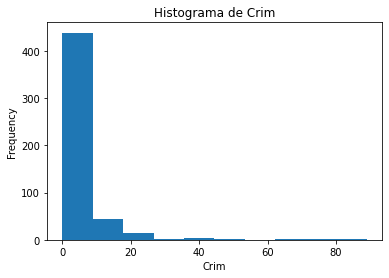

In [8]:
df["crim"].plot.hist()
plt.xlabel("Crim")
plt.title("Histograma de Crim")
plt.show()

La característica "crim" corresponde al porcentaje de criminalidad per cápita por ciudad. 

Su valor mínimo es 0.006320

Su valor máximo es 88.976200

Su promedio es 3.613524

Su desviación estandar es 8.601545

Entre 0 y 50 se encuentra la mayor cantidad de valores.



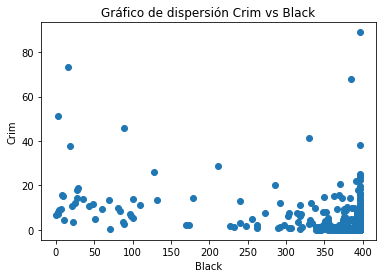

In [9]:
plt.scatter(df["black"], df["crim"])
plt.xlabel("Black")
plt.ylabel('Crim')
plt.title("Gráfico de dispersión Crim vs Black")
plt.show()

In [10]:
df["zn"].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

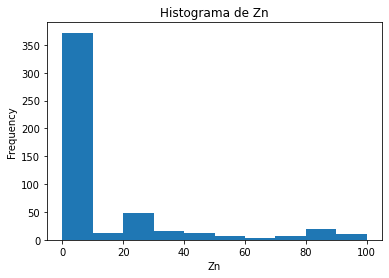

In [11]:
df["zn"].plot.hist()
plt.xlabel("Zn")
plt.title("Histograma de Zn")
plt.show()

La característica "zn" corresponde a la proporción de zonas residenciales para lotes sobre los 25,000 sq.ft.

Su valor mínimo es 0.000000

Su valor máximo es 100.000000

Su promedio es 11.363636

Su desviación estandar es 23.322453

Según el histograma podemos deducir que entre 0 y 10 se encuentra la moda, la cual presenta una alta frecuencia, con una diferencia muy marcada en relación a los otros rangos. El resto de valores se divide relativamente uniforme. 


In [12]:
df["indus"].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64

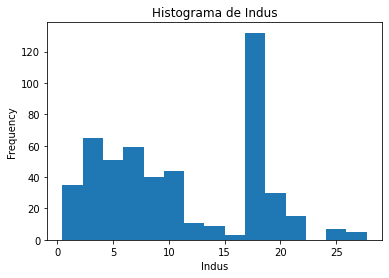

In [13]:
df["indus"].plot.hist(bins=15)
plt.xlabel("Indus")
plt.title("Histograma de Indus")
plt.show()

La característica "indus" corresponde a la proporción de acres de negocios que no sean de retail por ciudad.

Su valor mínimo es 0.460000

Su valor máximo es 27.740000

Su promedio es 11.136779

Desviación estandar 6.860353

Entre el rango de 0 a 14 podemos ver una relativa uniformidad.

Por otro lado cercano al valor 17 hay un notable crecimiento en la frecuencia. 








In [14]:
df["chas"].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: chas, dtype: float64

La característica "chas" equivale a la variable auxiliar sobre, si se encuentra cercano el rio.

Su valor mínimo es 0.000000

Su valor máximo es 1.000000

Su promedio es 0.069170

Desviación estandar 0.253994

Esta característica solo varía entre 0 y 1 sin poder tomar otros valores.
El 1 equivale a Si y el 0 a No.  

In [15]:
df.groupby("chas").size()

chas
0    471
1     35
dtype: int64

[]

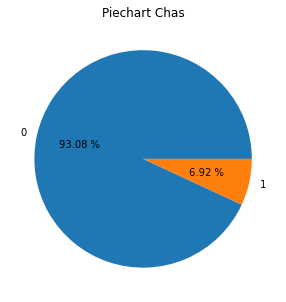

In [16]:
df.groupby("chas").size().plot.pie(title="Piechart Chas", label='', autopct="%0.2f %%", figsize=(5,5))
plt.plot()

Según el gráfico de torta, el 6,92 % de las casas colindan con el río y el 93,08 % No colindan con el río. 

In [17]:
df["nox"].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64

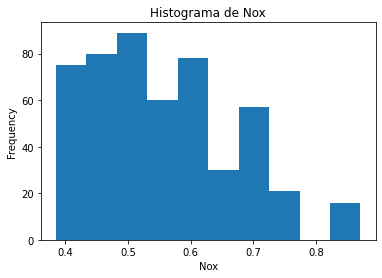

In [18]:
df["nox"].plot.hist()
plt.xlabel("Nox")
plt.title("Histograma de Nox")
plt.show()

La característica "nox" corresponde a los óxidos de nitrógeno medidos en partes por 10 millones. 

Su valor mínimo es 0.385000

Su valor máximo es 0.871000

Su promedio es 0.554695

Desviación estandar 0.115878

Según el histograma anterior podemos decir que la frecuencia es similar a la campana de gauss en descenso.

In [19]:
df["rm"].mode()

0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
dtype: float64

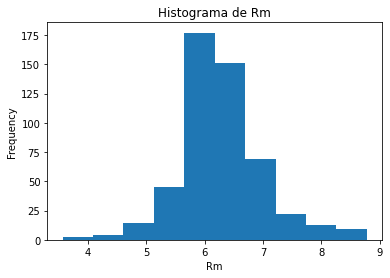

In [20]:
df["rm"].plot.hist()
plt.xlabel("Rm")
plt.title("Histograma de Rm")
plt.show()

La característica "rm" corresponde a el número promedio de habitaciones por vivienda.

Su valor mínimo es 3.561000

Su valor máximo es 8.780000

Su promedio es 6.284634

Desviación estandar 0.702617

En el histograma se puede notar que el promedio es similar a la mediana. 

Ádemas podemos observar que existen 6 modas que se encuentran en el intervalo de 5.713 y 6.417. 

Por otra parte podemos deducir que la mayor frecuencia se encuentra en el rango de 5,6486 y 6,1705.


In [21]:
df["age"].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64

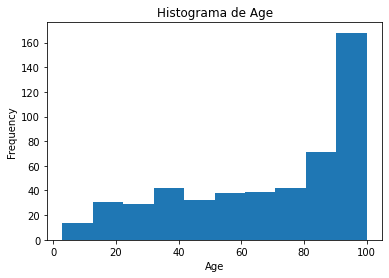

In [22]:
df["age"].plot.hist()
plt.xlabel("Age")
plt.title("Histograma de Age")
plt.show()

La característica "age" corresponde a unidades construidas ocupadas por sus dueños antes de 1940.

Su valor mínimo es 2.900000

Su valor máximo es 100.000000

Su promedio es 68.574901

Desviación estandar 28.148861

Según el histograma tenemos muchas ciudades de Boston que a la fecha de 1940 todas las casas estaban habitadas por sus dueños. 

Por otro lado la mayor frecuencia corresponde al rango del 90% a 100%, siendo esta cercano a 170. 

In [23]:
df["dis"].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

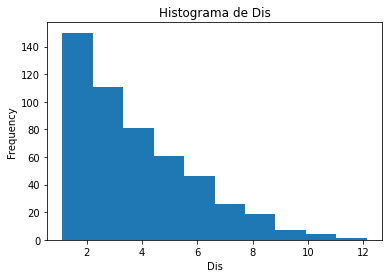

In [24]:
df["dis"].plot.hist()
plt.xlabel("Dis")
plt.title("Histograma de Dis")
plt.show()

La característica "dis" es el promedio ponderado de la distancia hacia 5 centros de empleo de Boston.

Su valor mínimo es 1.129600

Su valor máximo es 12.126500

Su promedio es 3.795043

Desviación estandar 2.105710

En el histrograma podemos notar una distribución binomial truncada. 


In [25]:
df["rad"].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

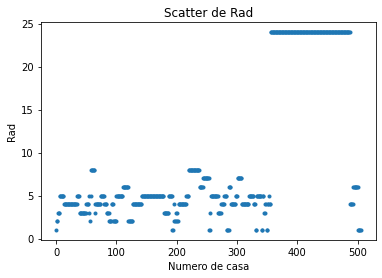

In [26]:
df["rad"].plot(ls="", marker=".")
plt.xlabel("Numero de casa")
plt.ylabel("Rad")
plt.title("Scatter de Rad")
plt.show()

In [27]:
df.groupby("rad").size()

rad
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
dtype: int64

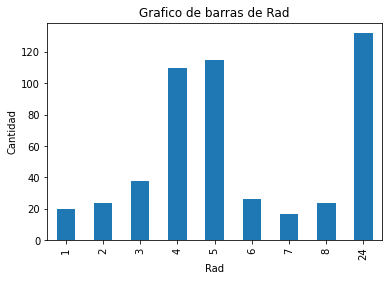

In [28]:
df.groupby("rad").size().plot.bar()
plt.xlabel("Rad")
plt.title("Grafico de barras de Rad")
plt.ylabel("Cantidad")
plt.show()

La característica "rad" corresponde al indice de accesibilidad a carreteras principales 

Su valor mínimo es 1.000000

Su valor máximo es 24.000000

Su promedio es 9.549407

Desviación estandar 8.707259

En el gráfico asociado a "rad" se puede notar 9 valores distintos y los mas frecuentes equivalen a 4, 5 y 24

In [29]:
df["tax"].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [30]:
df.groupby("tax").size()

tax
187.0      1
188.0      7
193.0      8
198.0      1
216.0      5
        ... 
432.0      9
437.0     15
469.0      1
666.0    132
711.0      5
Length: 66, dtype: int64

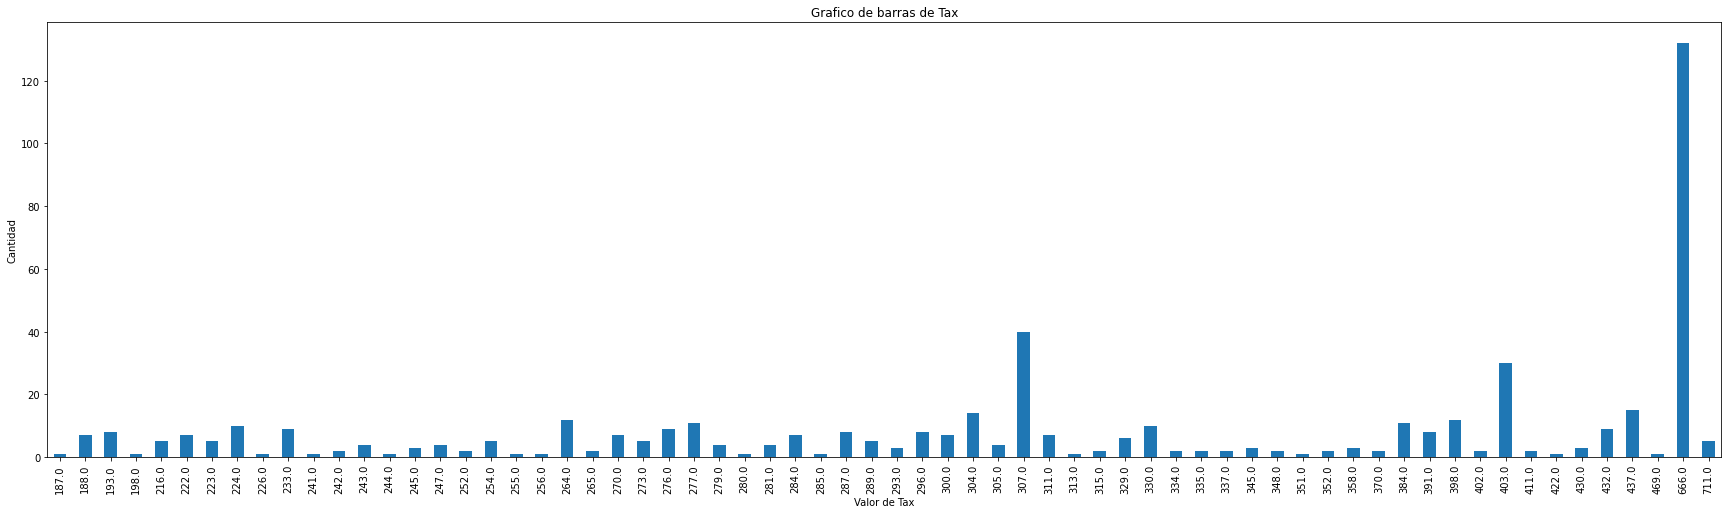

In [31]:
df.groupby("tax").size().plot.bar(figsize=(30,8))
plt.xlabel("Valor de Tax")
plt.ylabel('Cantidad')
plt.title("Grafico de barras de Tax")
plt.show()

La característica "tax" es la proporción de impuesto por propiedad como valor total cada $10,000.

Su valor mínimo es 187.000000

Su valor máximo es 711.000000

Su promedio es 408.237154

Desviación estandar 168.537116

Según el histograma tenemos 66 valores discretos posibles. El valor que más se repite es 666.0, 132 veces.


In [32]:
df["ptratio"].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

In [33]:
df.groupby("ptratio").size().count()

46

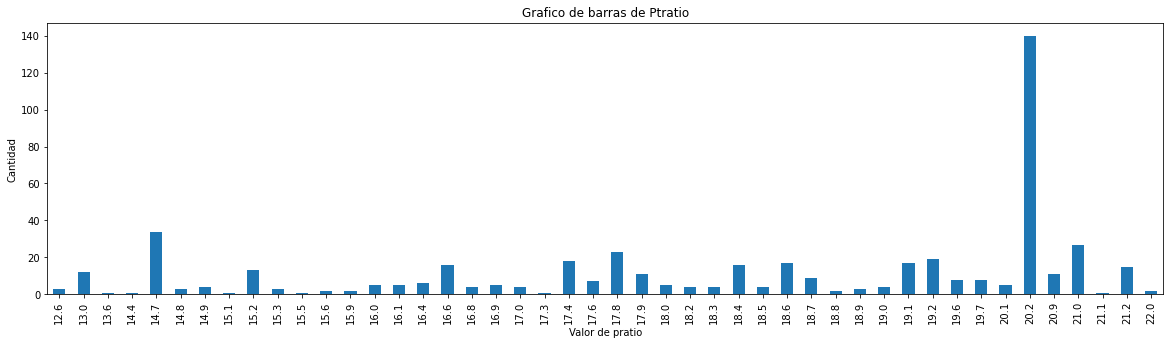

In [34]:
df.groupby("ptratio").size().plot.bar(figsize=(20,5))
plt.xlabel("Valor de pratio")
plt.ylabel("Cantidad")
plt.title("Grafico de barras de Ptratio")
plt.show()

La característica "ptratio" es la proporción estudiante promedio por ciudad. 

Su valor mínimo es 12.600000

Su valor máximo es 22.000000

Su promedio es 18.455534

Desviación estandar 2.164946

En base al gráfico de barra se puede concluir que existen 46 valores posibles y el más común es 20,2


In [35]:
df["black"].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: black, dtype: float64

In [36]:
df.groupby("black").size().count()

357

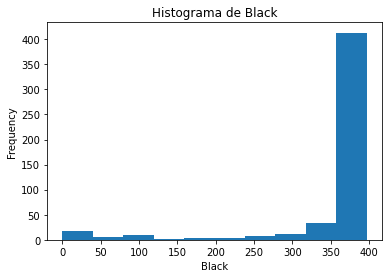

In [37]:
df["black"].plot.hist()
plt.xlabel("Black")
plt.title("Histograma de Black")
plt.show()

La característica "black" es 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de color por ciudad. 

Su valor mínimo es 0.320000

Su valor máximo es 396.900000

Su promedio es 356.674032

Desviación estandar 91.294864

En el histograma las mayores frecuencias estan sobre los 350.



In [38]:
df["lstat"].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

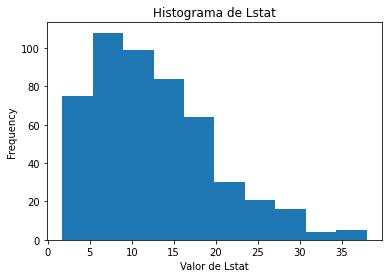

In [39]:
df["lstat"].plot.hist()
plt.xlabel("Valor de Lstat")
plt.title("Histograma de Lstat")
plt.show()

La característica "lstat" equivale al estatus más bajo de la población medido en porcentaje. Se refiere a la cantidad de población sin estudios secundarios completados, junto a los obreros.  

Su valor mínimo es 1.730000

Su valor máximo es 37.970000

Su promedio es 12.653063

Desviación estandar 7.141062

En el histograma se observa que el grueso de las ciudades tiene un 20% o menos de la población que no ha terminado los estudios secundarios.  



In [40]:
df["medv"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

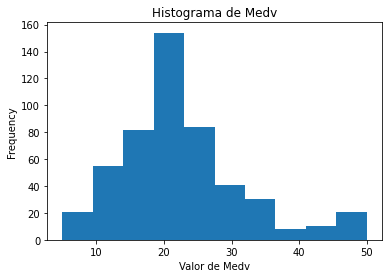

In [41]:
df["medv"].plot.hist()
plt.xlabel("Valor de Medv")
plt.title("Histograma de Medv")
plt.show()

La característica "medv" es el valor de la mediana de las casas ocupadas por sus dueños, medidas en $1000s. 

Su valor mínimo es 5.000000

Su valor máximo es 50.000000

Su promedio es 22.532806

Desviación estandar 9.197104

En el histograma notamos una distribución similar a una normal. 

## Parte 2 - Preparación de datos


### Análisis y preparación


#### Definición de funciones útiles - limpieza

#### Crim

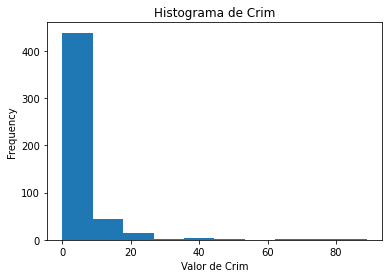

In [42]:
df["crim"].plot.hist()
plt.xlabel("Valor de Crim")
plt.title("Histograma de Crim")
plt.show()

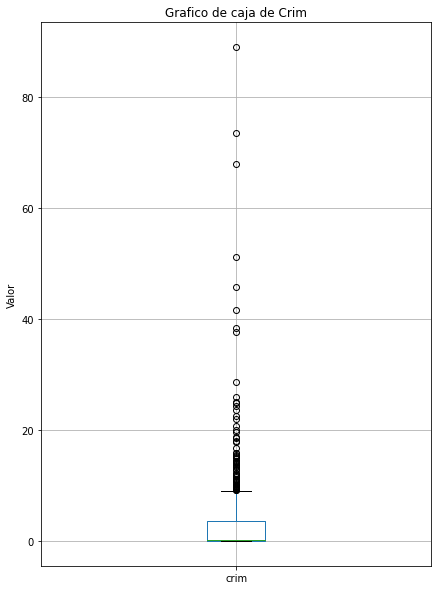

In [43]:
df.boxplot(column=["crim"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Crim")
plt.show()

En los diagramas de caja o _boxplot_ la caja central corresponde a a las demarcaciones de $Q_{1}$ y $Q_{3}$, la línea intermedia, poco visible en este caso, a la mediana, es decir $Q_{2}$, los "bigotes" a los límites no anómalos que van desde los valores máximo y mínimo o 1.5 IQR. Los círculos representan datos atípicos, fuera de los límites ya señalados.

Es visible la importante cantidad de datos fuera de los límites no atípicos (rango intercuartílico $\pm 1.5$ $IQR$).

Lo señalado anteriormente fue extraído de *https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm*, Instituto Nacional de Estándares y Tecnología de EE.UU.(NIST por sus siglas en inglés).

In [44]:
def clean_custom(df, col, iqrFences):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - iqrFences * iqr
    fence_high = q3 + iqrFences * iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    size = df_out.shape[0]
    pctg = size/df.shape[0]   # calcula el porcentaje de observaciones consideradas respecto al df original
    return df_out, pctg

def clean_outliers_hard(df, col):
    # elimina outliers fuera del rango +- 1.5 IQR de los cuartiles
    # En el boxplot, elimina los datos atípicos
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out

def clean_outliers_soft(df, col):
    # elimina outliers fuera del rango +- 3.0 IQR de los cuartiles
    # Dado que sus limites son mas amplios, elimina menos datos o equivalentemente considera mas datos
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - 3*iqr
    fence_high = q3 + 3*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out


In [45]:
#print(df[df["crim"].between(df["crim"].quantile(0.25), df["crim"].quantile(0.75))].shape[0])

Proporcion de datos considerados:  0.8695652173913043


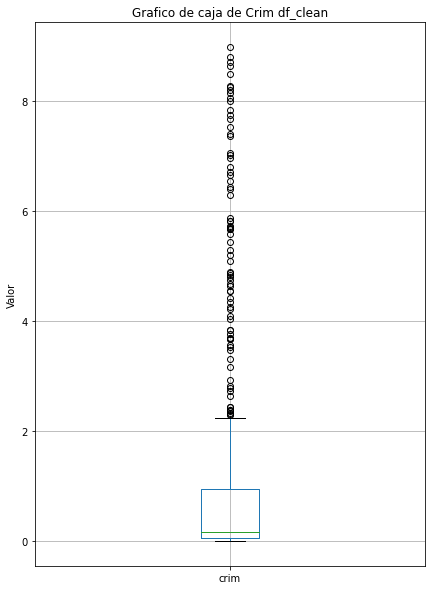

In [46]:
df_clean, df_clean_p = clean_custom(df, "crim", 1.5)
print("Proporcion de datos considerados: ", df_clean_p)

df_clean.boxplot(column=["crim"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Crim df_clean")
plt.show()

In [47]:
df.describe()

crim          zn       indus  ...       black       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

In [48]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  440.000000  440.000000  440.000000  ...  440.000000  440.000000  440.000000
mean     1.198341   13.068182   10.092295  ...  371.056705   11.201068   23.967727
std      2.128147   24.563940    6.764409  ...   65.555250    6.011666    8.649953
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    7.000000
25%      0.068962    0.000000    4.860000  ...  378.087500    6.567500   18.800000
50%      0.176440    0.000000    8.140000  ...  392.190000   10.140000   22.000000
75%      0.960870   20.000000   18.100000  ...  396.080000   14.722500   26.775000
max      8.982960  100.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [49]:
df2 = clean_outliers_hard(df, "crim")
df3 = clean_outliers_soft(df, "crim")

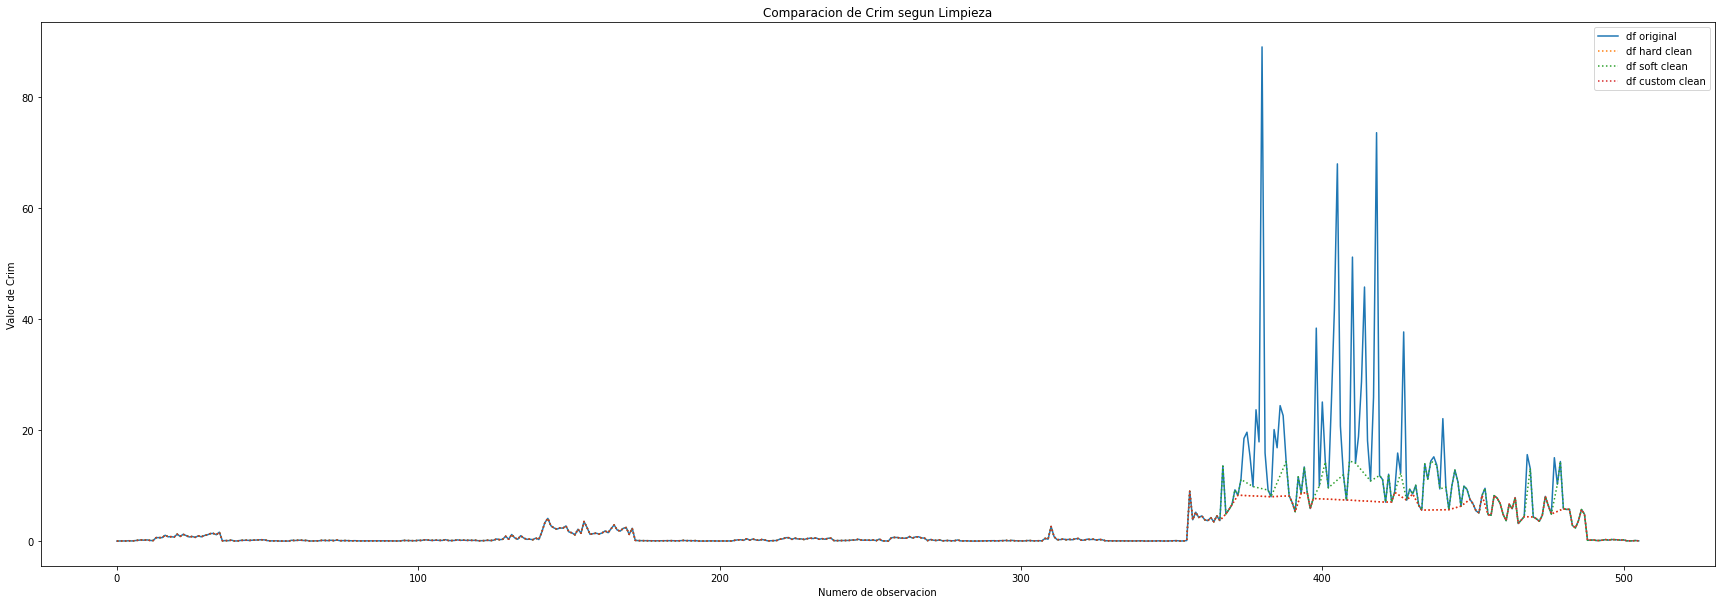

In [50]:
plt.figure(figsize=(30,10))
plt.plot(df["crim"], label="df original", ls="-", marker="")
plt.plot(df2["crim"], label="df hard clean", ls=":")
plt.plot(df3["crim"], label="df soft clean", ls=":")
plt.plot(df_clean["crim"], label="df custom clean", ls=":")
plt.legend()
plt.xlabel("Numero de observacion")
plt.ylabel('Valor de Crim')
plt.title("Comparacion de Crim segun Limpieza")
plt.show()

De lo anterior, ya que df_clean contiene el 86.96% aproximadamente de los casos, se propone df_clean como dataset limpio respecto a la característica ***crim***.

In [51]:
def print_medidas(df, col):
    #automatización de muestra de medidas de tendencia central y stdv
    print("Medidas de tendencia central: \n")
    print(df[col].describe(), "\n\n")
    print("Moda(s): \n")
    print(df[col].mode(), "\n\n")
    print("Mediana: \n")
    print(df[col].median(), "\n\n")
    print("Varianza: \n")
    print(df[col].var())

In [52]:
print_medidas(df_clean, "crim")
print('\n', "##"*15, '\n')
print_medidas(df, "crim")

Medidas de tendencia central: 

count    440.000000
mean       1.198341
std        2.128147
min        0.006320
25%        0.068962
50%        0.176440
75%        0.960870
max        8.982960
Name: crim, dtype: float64 


Moda(s): 

0    0.01501
dtype: float64 


Mediana: 

0.17643999999999999 


Varianza: 

4.529009024258679

 ############################## 

Medidas de tendencia central: 

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64 


Moda(s): 

0     0.01501
1    14.33370
dtype: float64 


Mediana: 

0.25651 


Varianza: 

73.98657819906929


#### Zn

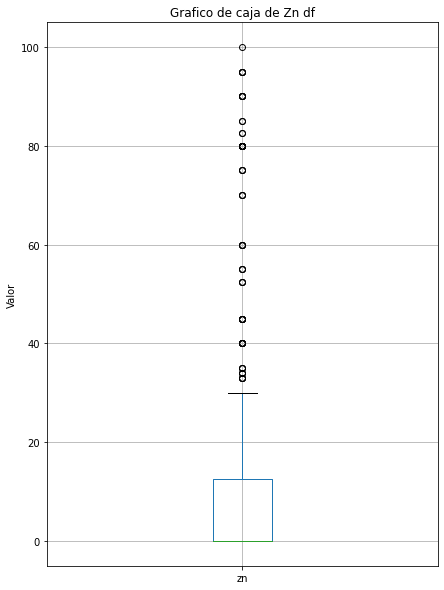

In [53]:
df.boxplot(column=["zn"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Zn df")
plt.show()

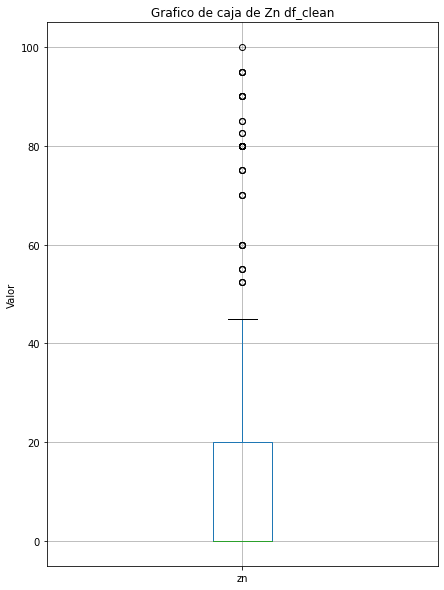

In [54]:
df_clean.boxplot(column=["zn"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Zn df_clean")
plt.show()

In [55]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "zn", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.8977272727272727 




Del filtrado anterior por **Zn**, el nuevo dataset contiene un 89.77% de las observaciones respecto al original.

In [56]:
df_clean, df_clean_p = clean_custom(df_clean, "zn", 1.5)

In [57]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  395.000000  395.000000  395.000000  ...  395.000000  395.000000  395.000000
mean     1.330958    5.791139   10.931038  ...  369.046481   11.801873   23.341266
std      2.207676   11.576332    6.625445  ...   68.792032    5.996162    8.413429
min      0.006320    0.000000    1.250000  ...    0.320000    1.730000    7.000000
25%      0.091710    0.000000    5.860000  ...  377.675000    7.195000   18.450000
50%      0.224890    0.000000    8.560000  ...  391.930000   10.740000   21.700000
75%      1.242130    0.000000   18.100000  ...  396.060000   15.380000   25.000000
max      8.982960   45.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [58]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[395 rows x 14 columns]

#### Indus

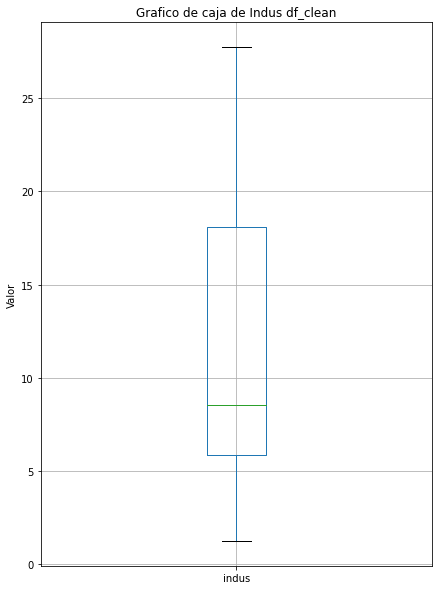

In [59]:
df_clean.boxplot(column=["indus"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Indus df_clean")
plt.show()

In [60]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "indus", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  1.0 




In [61]:
df_clean, df_clean_p = clean_custom(df_clean, "indus", 1.5)

In [62]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  395.000000  395.000000  395.000000  ...  395.000000  395.000000  395.000000
mean     1.330958    5.791139   10.931038  ...  369.046481   11.801873   23.341266
std      2.207676   11.576332    6.625445  ...   68.792032    5.996162    8.413429
min      0.006320    0.000000    1.250000  ...    0.320000    1.730000    7.000000
25%      0.091710    0.000000    5.860000  ...  377.675000    7.195000   18.450000
50%      0.224890    0.000000    8.560000  ...  391.930000   10.740000   21.700000
75%      1.242130    0.000000   18.100000  ...  396.060000   15.380000   25.000000
max      8.982960   45.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [63]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[395 rows x 14 columns]

#### Chas

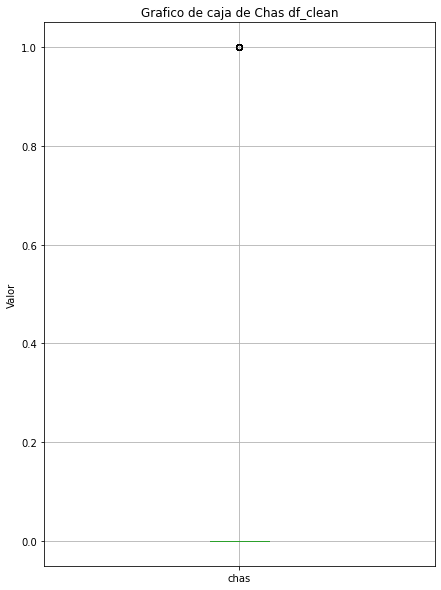

In [64]:
df_clean.boxplot(column=["chas"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Chas df_clean")
plt.show()

Dado que es una variable categórica, no tiene sentido separarla. Se toman todos los datos.

#### Nox

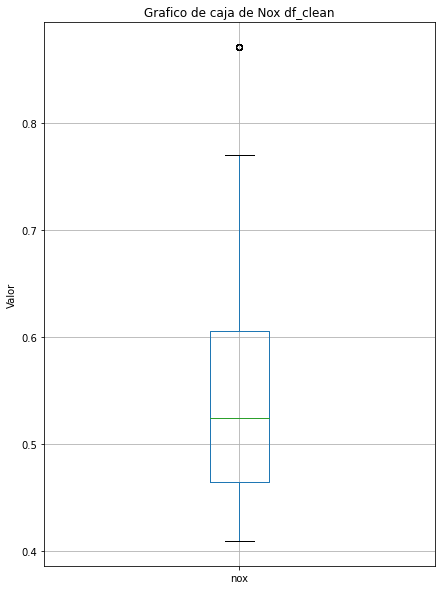

In [65]:
df_clean.boxplot(column=["nox"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Nox df_clean")
plt.show()

In [66]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "nox", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.959493670886076 




In [67]:
df_clean, df_clean_p = clean_custom(df_clean, "nox", 1.5)

In [68]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  379.000000  379.000000  379.000000  ...  379.000000  379.000000  379.000000
mean     1.288425    6.035620   10.565910  ...  371.921715   11.468338   23.633245
std      2.237904   11.756037    6.515718  ...   65.200201    5.712661    8.442394
min      0.006320    0.000000    1.250000  ...    0.320000    1.730000    7.000000
25%      0.089690    0.000000    5.640000  ...  379.165000    6.925000   18.750000
50%      0.211240    0.000000    8.140000  ...  392.110000   10.450000   21.800000
75%      0.918510    0.000000   18.100000  ...  396.100000   14.810000   25.250000
max      8.982960   45.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [69]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[379 rows x 14 columns]

#### Rm

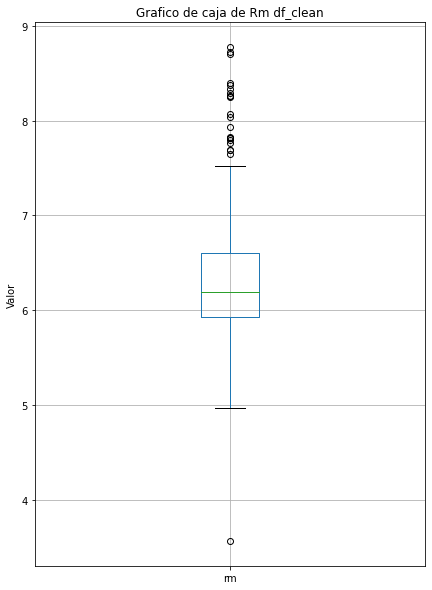

In [70]:
df_clean.boxplot(column=["rm"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Rm df_clean")
plt.show()

In [71]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "rm", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.941952506596306 




In [72]:
df_clean, df_clean_p = clean_custom(df_clean, "rm", 1.5)

In [73]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  357.000000  357.000000  357.000000  ...  357.000000  357.000000  357.000000
mean     1.315877    6.009804   10.728992  ...  371.185294   11.898487   22.403361
std      2.285343   11.883058    6.501307  ...   67.055017    5.595339    6.788021
min      0.006320    0.000000    1.250000  ...    0.320000    1.730000    7.000000
25%      0.088730    0.000000    5.860000  ...  379.380000    7.600000   18.500000
50%      0.196570    0.000000    8.560000  ...  392.530000   11.100000   21.500000
75%      0.955770    0.000000   18.100000  ...  396.230000   15.370000   24.600000
max      8.982960   45.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [74]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[357 rows x 14 columns]

#### Age

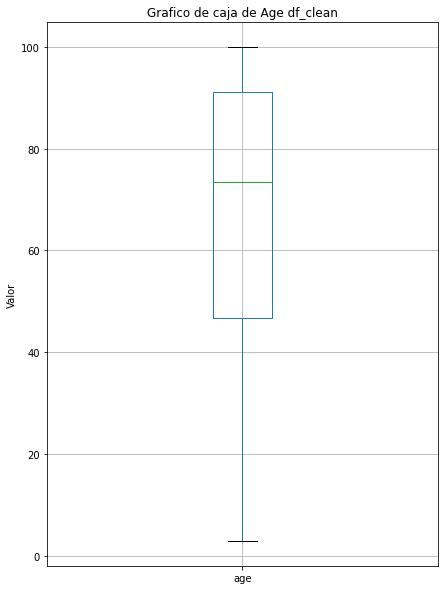

In [75]:
df_clean.boxplot(column=["age"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Age df_clean")
plt.show()

In [76]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "age", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  1.0 




In [77]:
df_clean, df_clean_p = clean_custom(df_clean, "age", 1.5)

In [78]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  357.000000  357.000000  357.000000  ...  357.000000  357.000000  357.000000
mean     1.315877    6.009804   10.728992  ...  371.185294   11.898487   22.403361
std      2.285343   11.883058    6.501307  ...   67.055017    5.595339    6.788021
min      0.006320    0.000000    1.250000  ...    0.320000    1.730000    7.000000
25%      0.088730    0.000000    5.860000  ...  379.380000    7.600000   18.500000
50%      0.196570    0.000000    8.560000  ...  392.530000   11.100000   21.500000
75%      0.955770    0.000000   18.100000  ...  396.230000   15.370000   24.600000
max      8.982960   45.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [79]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[357 rows x 14 columns]

#### Dis

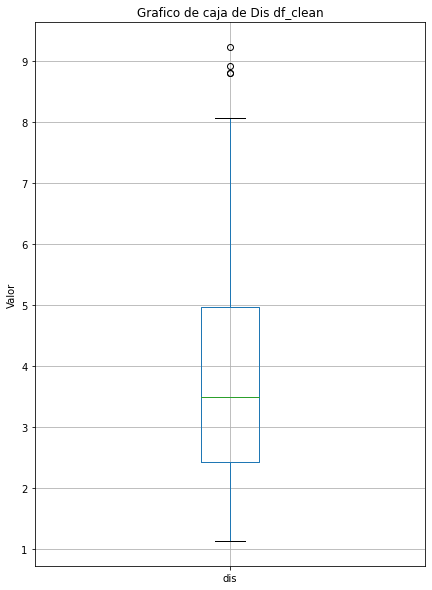

In [80]:
df_clean.boxplot(column=["dis"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Dis df_clean")
plt.show()

In [81]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "dis", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.988795518207283 




In [82]:
df_clean, df_clean_p = clean_custom(df_clean, "dis", 1.5)

In [83]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  353.000000  353.000000  353.000000  ...  353.000000  353.000000  353.000000
mean     1.330241    5.739377   10.822975  ...  370.954873   11.966884   22.339660
std      2.294268   11.622070    6.473968  ...   67.398339    5.587110    6.788218
min      0.006320    0.000000    1.520000  ...    0.320000    1.730000    7.000000
25%      0.091030    0.000000    5.860000  ...  378.380000    7.700000   18.500000
50%      0.206080    0.000000    8.560000  ...  392.530000   11.220000   21.400000
75%      0.976170    0.000000   18.100000  ...  396.230000   15.390000   24.500000
max      8.982960   45.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [84]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[353 rows x 14 columns]

#### Rad

In [85]:
df_clean.groupby("rad").size()

rad
1     10
2     16
3     28
4     96
5     83
6     23
7     15
8     18
24    64
dtype: int64

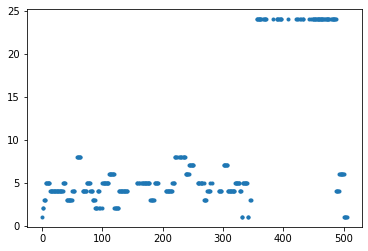

In [86]:
df_clean["rad"].plot(ls="",marker=".")

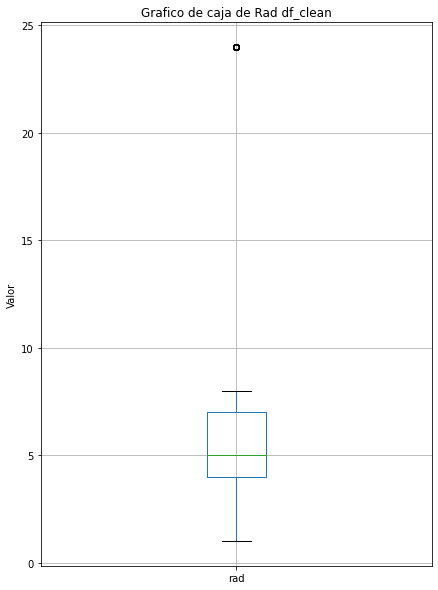

In [87]:
df_clean.boxplot(column=["rad"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Rad df_clean")
plt.show()

In [88]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "rad", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.8186968838526912 




In [89]:
df_clean, df_clean_p = clean_custom(df_clean, "rad", 1.5)

In [90]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  289.000000  289.000000  289.000000  ...  289.000000  289.000000  289.000000
mean     0.327169    7.010381    9.211453  ...  383.531696   11.264429   22.926644
std      0.458829   12.495898    6.070608  ...   31.510981    5.504148    6.085366
min      0.006320    0.000000    1.520000  ...   70.800000    1.730000    7.000000
25%      0.079780    0.000000    5.190000  ...  385.640000    7.200000   19.300000
50%      0.144760    0.000000    7.870000  ...  393.290000   10.150000   22.000000
75%      0.341090   12.500000   10.590000  ...  396.900000   14.100000   25.000000
max      2.924000   45.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [91]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[289 rows x 14 columns]

#### Tax

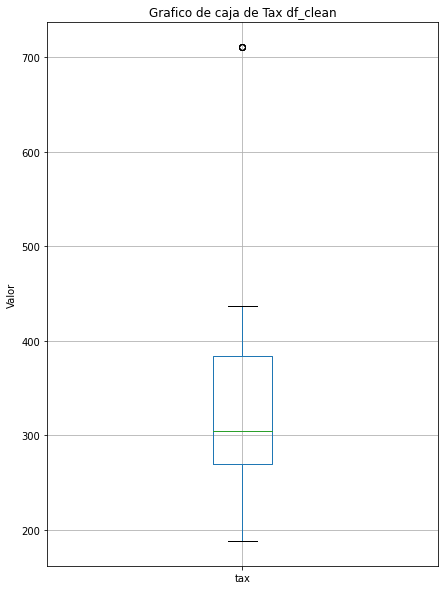

In [92]:
df_clean.boxplot(column=["tax"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Tax df_clean")
plt.show()

In [93]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "tax", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9826989619377162 




In [94]:
df_clean, df_clean_p = clean_custom(df_clean, "tax", 1.5)

In [95]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  284.000000  284.000000  284.000000  ...  284.000000  284.000000  284.000000
mean     0.330257    7.133803    8.885246  ...  383.789014   11.099613   23.104930
std      0.462236   12.570707    5.597419  ...   31.443250    5.356553    5.952679
min      0.006320    0.000000    1.520000  ...   70.800000    1.730000   11.900000
25%      0.078908    0.000000    5.130000  ...  385.730000    7.125000   19.300000
50%      0.144655    0.000000    7.380000  ...  393.295000   10.040000   22.150000
75%      0.349835   12.500000   10.155000  ...  396.900000   13.867500   25.000000
max      2.924000   45.000000   25.650000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [96]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[284 rows x 14 columns]

#### Ptratio

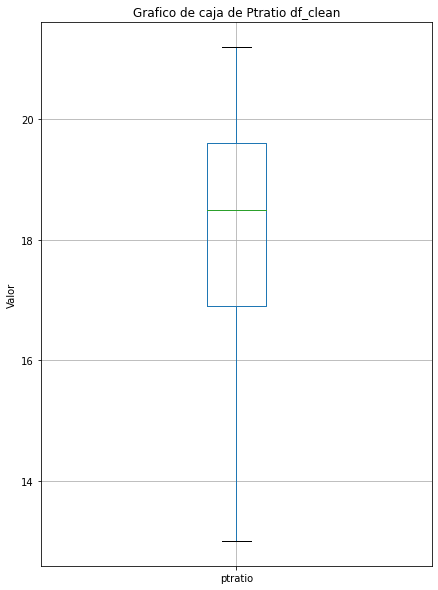

In [97]:
df_clean.boxplot(column=["ptratio"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Ptratio df_clean")
plt.show()

In [98]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "ptratio", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  1.0 




In [99]:
df_clean, df_clean_p = clean_custom(df_clean, "ptratio", 1.5)

In [100]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  284.000000  284.000000  284.000000  ...  284.000000  284.000000  284.000000
mean     0.330257    7.133803    8.885246  ...  383.789014   11.099613   23.104930
std      0.462236   12.570707    5.597419  ...   31.443250    5.356553    5.952679
min      0.006320    0.000000    1.520000  ...   70.800000    1.730000   11.900000
25%      0.078908    0.000000    5.130000  ...  385.730000    7.125000   19.300000
50%      0.144655    0.000000    7.380000  ...  393.295000   10.040000   22.150000
75%      0.349835   12.500000   10.155000  ...  396.900000   13.867500   25.000000
max      2.924000   45.000000   25.650000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [101]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[284 rows x 14 columns]

#### Black

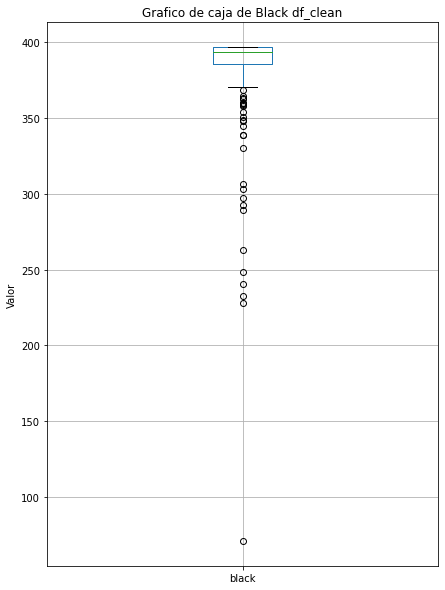

In [102]:
df_clean.boxplot(column=["black"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Black df_clean")
plt.show()

In [103]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "black", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9014084507042254 




In [104]:
df_clean, df_clean_p = clean_custom(df_clean, "black", 1.5)

In [105]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  256.000000  256.000000  256.000000  ...  256.000000  256.000000  256.000000
mean     0.248220    7.777344    8.479766  ...  391.470703   10.772070   23.414844
std      0.300335   12.904447    5.325249  ...    6.594430    5.102613    5.843530
min      0.006320    0.000000    1.520000  ...  370.310000    1.730000   11.900000
25%      0.071188    0.000000    5.130000  ...  389.355000    6.892500   19.575000
50%      0.136145    0.000000    6.960000  ...  393.805000    9.725000   22.200000
75%      0.285340   20.000000   10.010000  ...  396.900000   13.465000   25.025000
max      2.242360   45.000000   25.650000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]

In [106]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[256 rows x 14 columns]

#### Lstat

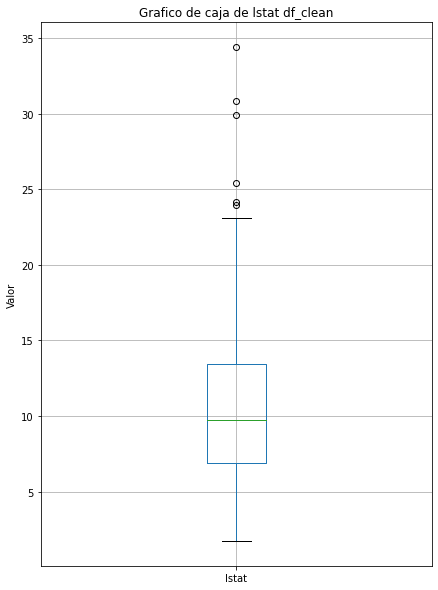

In [107]:
df_clean.boxplot(column=["lstat"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de lstat df_clean")
plt.show()

In [108]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "lstat", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9765625 




In [109]:
df_clean, df_clean_p = clean_custom(df_clean, "lstat", 1.5)

In [110]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  250.000000  250.000000  250.000000  ...  250.000000  250.000000  250.000000
mean     0.242534    7.914000    8.304080  ...  391.529760   10.355800   23.593200
std      0.290813   13.008246    5.133506  ...    6.503728    4.344954    5.789541
min      0.006320    0.000000    1.520000  ...  372.080000    1.730000   11.900000
25%      0.070153    0.000000    4.980000  ...  389.407500    6.862500   19.725000
50%      0.132100    0.000000    6.960000  ...  393.805000    9.675000   22.450000
75%      0.277023   20.000000    9.900000  ...  396.900000   13.135000   25.175000
max      2.242360   45.000000   25.650000  ...  396.900000   23.090000   50.000000

[8 rows x 14 columns]

In [111]:
df_clean

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[250 rows x 14 columns]

# Entrenamiento de modelos



In [112]:
df_clean.head(30)

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  19.15  27.1
9   0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311.0     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  13.27  18.9
12  0.09378  12.5   7.87     0  0.524  ...  311.0     15.2  390.50  15.71  21.7
13  0.62976   0.0   8.14     0  0.538  ...  307.0     21.0  396.90   8.26  20.4
14  0.63796   0.0   8.14     0  0.538  ...  307.0     21.0  380.02  10.26  18.2
15  0.62739   0.0   8.14     0  0.538  ...  307.0     21.0  395.62   8.47  19.9
16  1.05393   0.0   8.14     0  0.538  ...  307.0     21.0  386.85   6.58  23.1
17  0.78420   0.0   8.14     0  0.538  ...  307.0     21.0  386.75  14.67  17.5
19  0.72580   0.0   8.14     0  0.538  ...  307.0     21.0  390.95  11.28  18.2
20  1.25179   0.0   8.14     0  0.538  ...  307.0     21.0  376.57  21.02  13.6
21  0.85204   0.0   8.14     0  0.538  ...  307.0     21.0  392.53  13.83  19.6
22  1.23247   0.0   8.14     0  0.538  ...  307.0     21.0  396.90  18.72  15.2
23  0.98843   0.0   8.14     0  0.538  ...  307.0     21.0  394.54  19.88  14.5
24  0.75026   0.0   8.14     0  0.538  ...  307.0     21.0  394.33  16.30  15.6
26  0.67191   0.0   8.14     0  0.538  ...  307.0     21.0  376.88  14.81  16.6
28  0.77299   0.0   8.14     0  0.538  ...  307.0     21.0  387.94  12.80  18.4
29  1.00245   0.0   8.14     0  0.538  ...  307.0     21.0  380.23  11.98  21.0
31  1.35472   0.0   8.14     0  0.538  ...  307.0     21.0  376.73  13.04  14.5
35  0.06417   0.0   5.96     0  0.499  ...  279.0     19.2  396.90   9.68  18.9
36  0.09744   0.0   5.96     0  0.499  ...  279.0     19.2  377.56  11.41  20.0
37  0.08014   0.0   5.96     0  0.499  ...  279.0     19.2  396.90   8.77  21.0

[30 rows x 14 columns]

In [113]:
#index = list(df_clean.index.values) #guarda indices como lista, se usara en .loc para comparar los mismos datos despues

In [114]:
#df_clean.loc[[33, 35]] #comprobacion de idea: obtener cierto row por index

In [115]:
#ind = np.arange(314)
#df_clean = df_clean.reset_index()

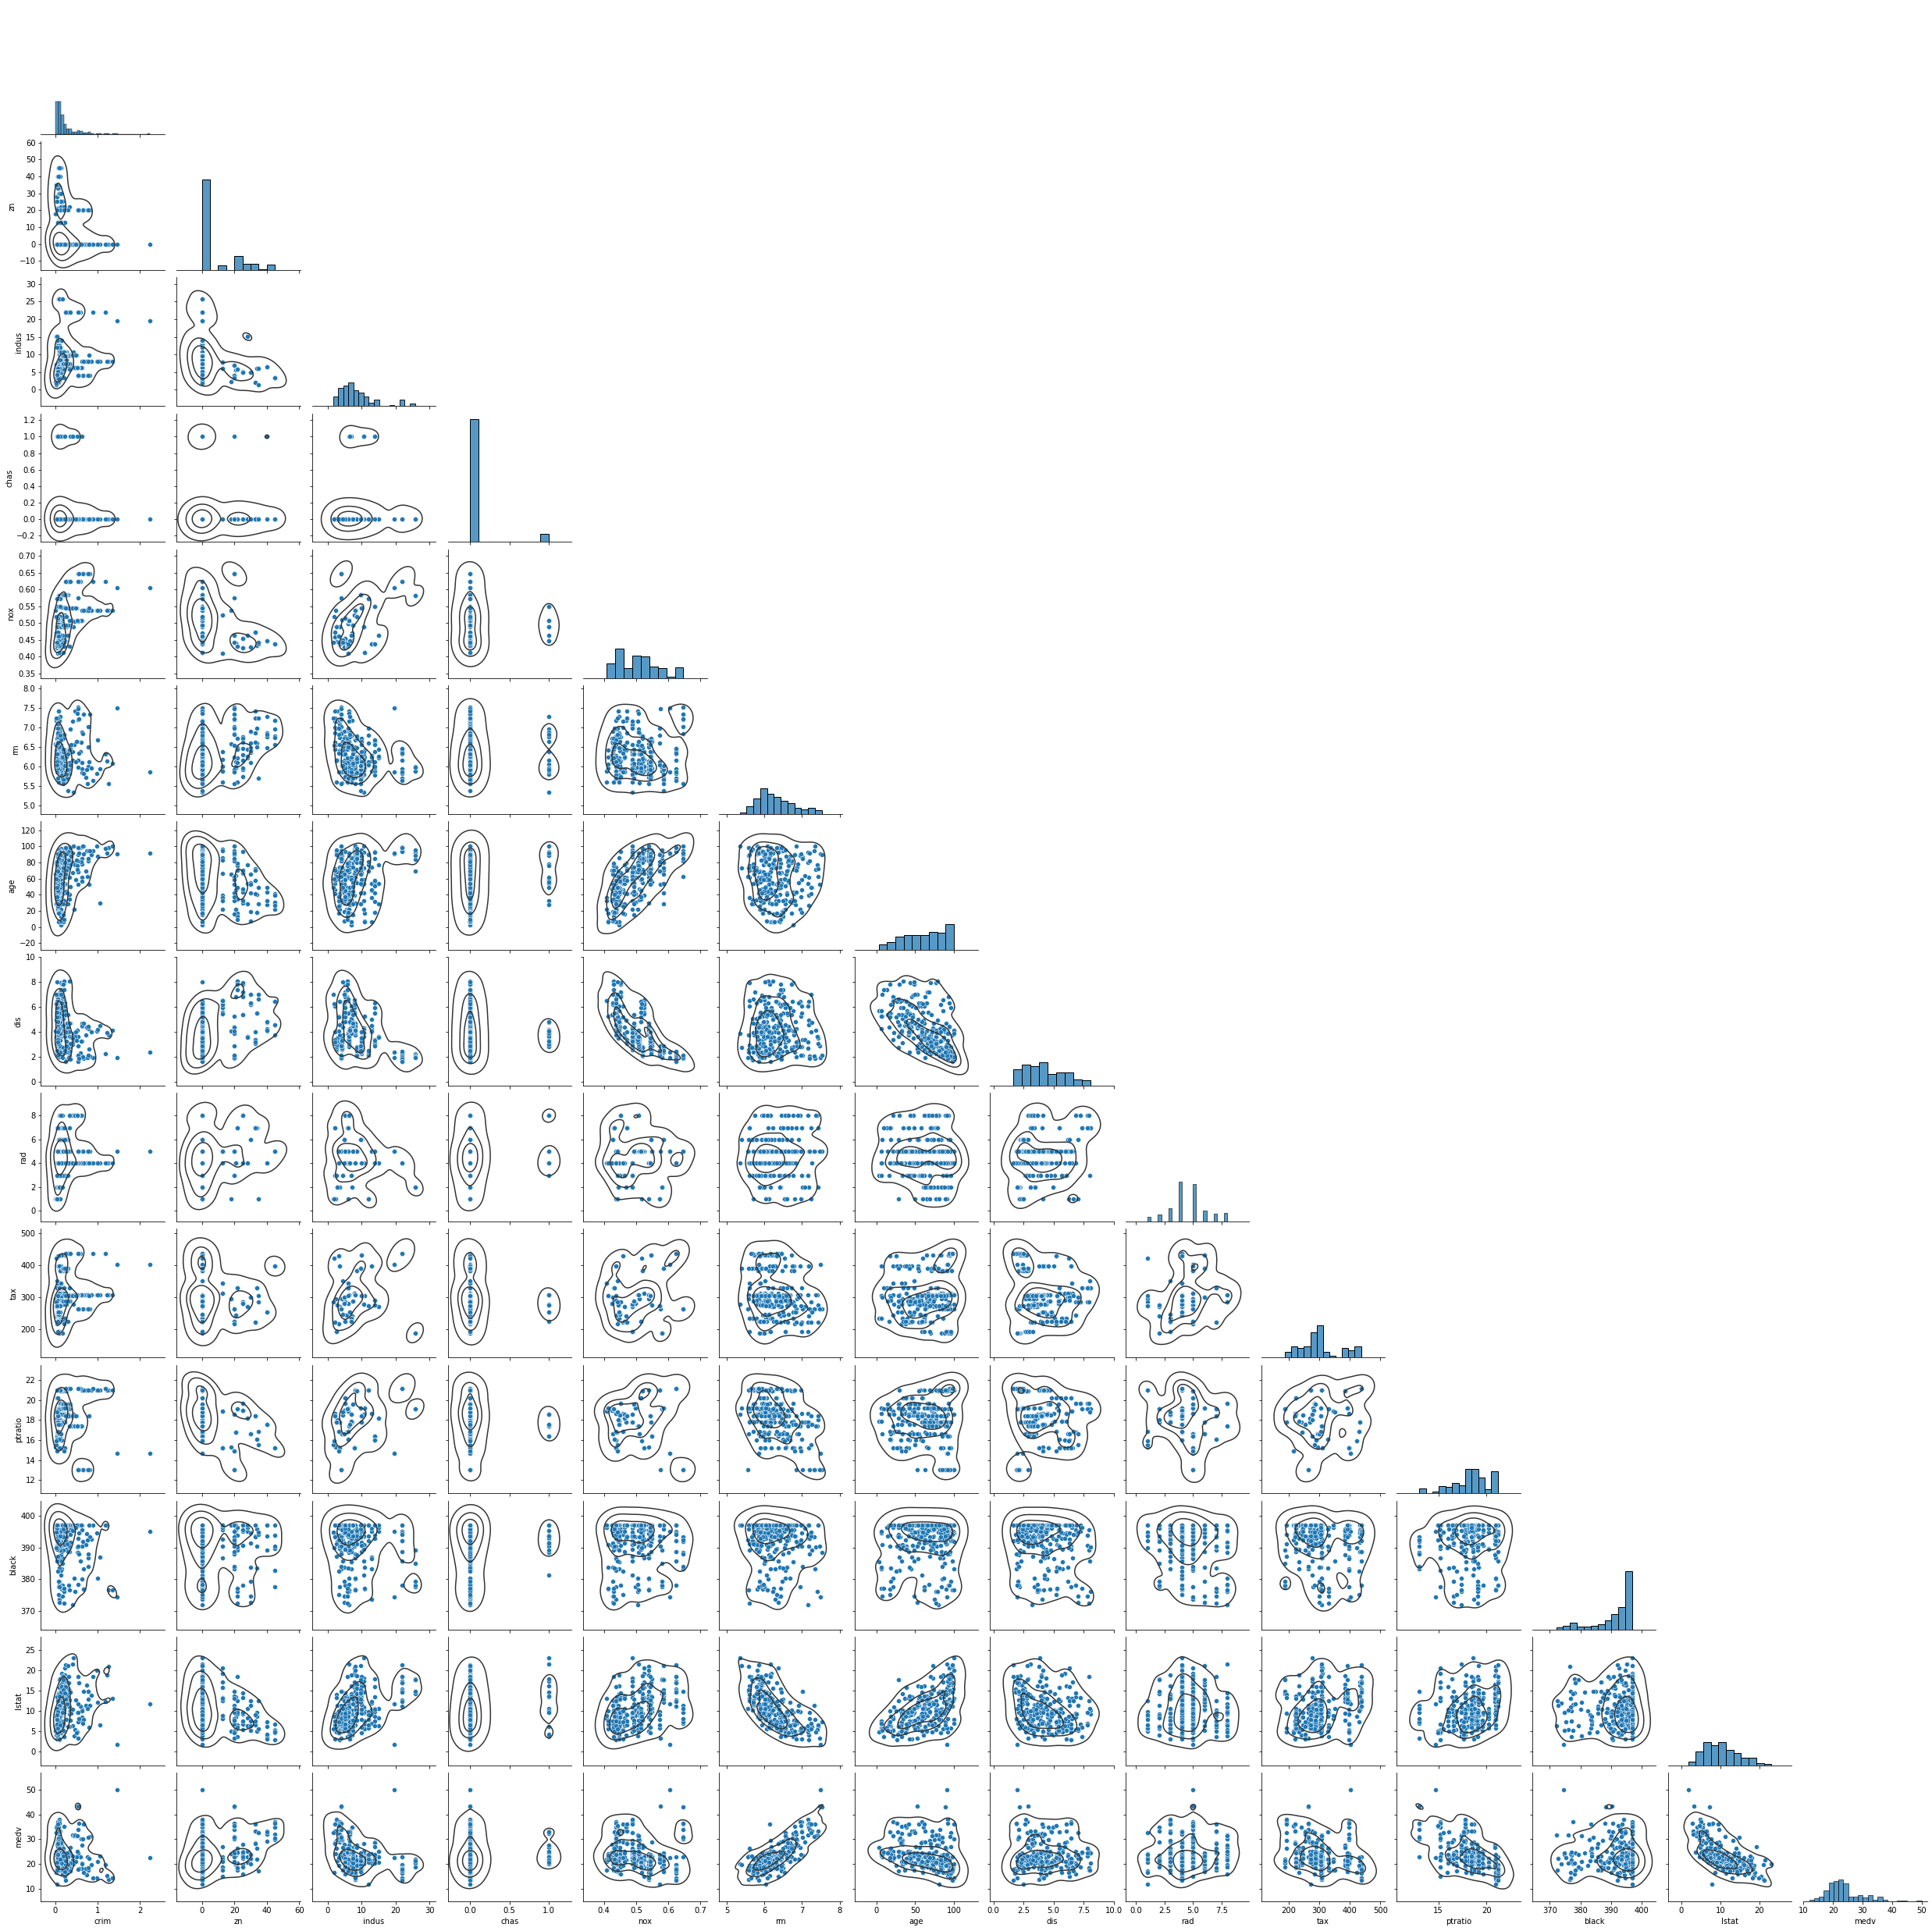

In [116]:
g = sns.pairplot(df_clean, corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [117]:
corrdat = df_clean.corr()

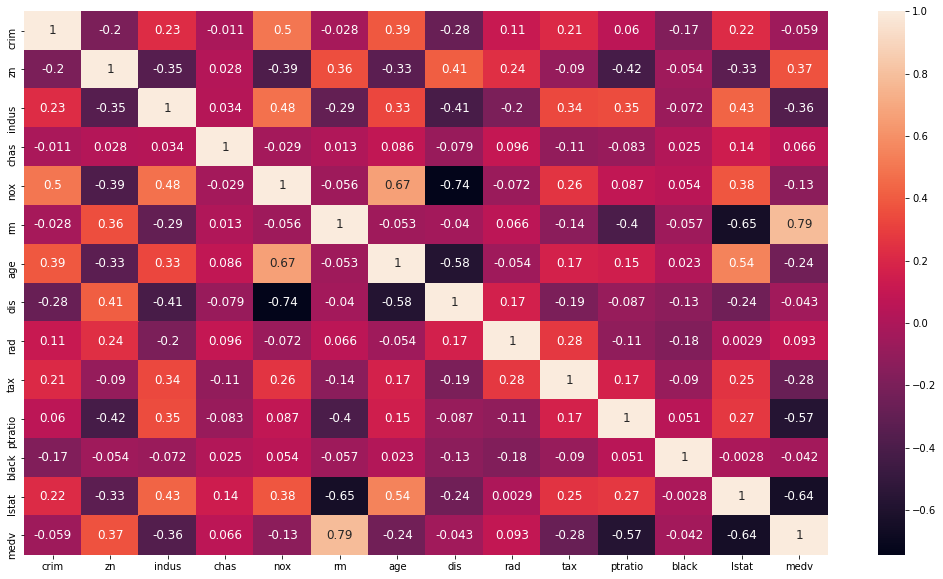

In [118]:
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

In [119]:
def getCorr(dat, lim): #obtiene los features con mayor impacto en el target
    feature = []
    valor = []
    
    for i , index in enumerate(dat.index): #bucle para todos los indices
        if abs(dat[index]) > lim:
            feature.append(index)
            print(index)
            valor.append(dat[index])

    df = pd.DataFrame(data = valor, index = feature, columns = ['corr value'])

    return df

In [120]:
lim = 0.4
corr_value = getCorr(corrdat["medv"], lim)

rm
ptratio
lstat
medv


In [121]:
corr_value

corr value
rm         0.788222
ptratio   -0.568388
lstat     -0.642424
medv       1.000000

In [122]:
df_op = df_clean[corr_value.index]
df_op.head()

rm  ptratio  lstat  medv
0  6.575     15.3   4.98  24.0
1  6.421     17.8   9.14  21.6
2  7.185     17.8   4.03  34.7
3  6.998     18.7   2.94  33.4
4  7.147     18.7   5.33  36.2

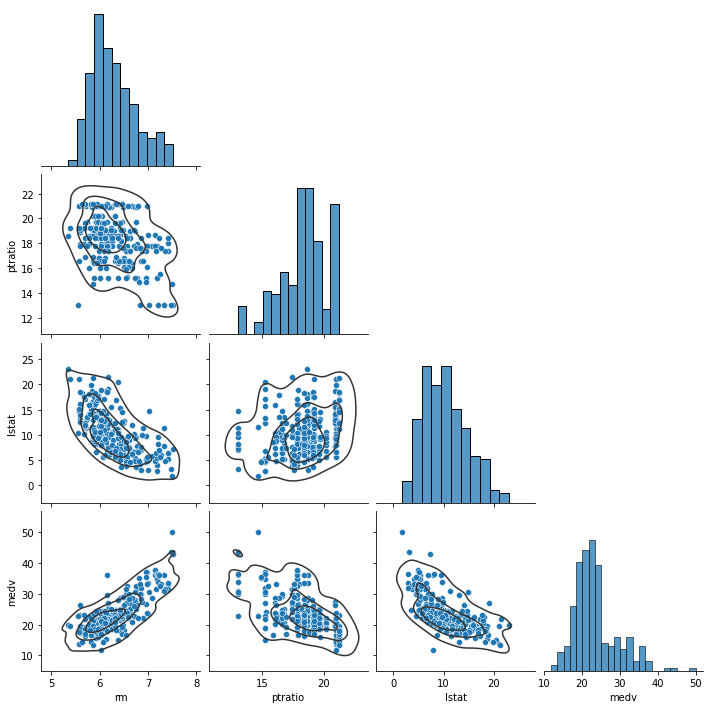

In [123]:
g = sns.pairplot(df_op, corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [124]:
X = df_op.drop(['medv'], axis=1)
Y = df_op.medv.copy()

In [125]:
X.head(10)

rm  ptratio  lstat
0   6.575     15.3   4.98
1   6.421     17.8   9.14
2   7.185     17.8   4.03
3   6.998     18.7   2.94
4   7.147     18.7   5.33
5   6.430     18.7   5.21
6   6.012     15.2  12.43
7   6.172     15.2  19.15
9   6.004     15.2  17.10
10  6.377     15.2  20.45

In [126]:
model_linreg = LinearRegression()

model_linreg.fit(X, Y)

Y_hat_1 = model_linreg.predict(X)

X_o = X.copy()

X_o["predicted"] = Y_hat_1

In [127]:
print("MSE:  ", mean_squared_error(Y, Y_hat_1))
print("RMSE: ", np.sqrt(mean_squared_error(Y, Y_hat_1)))
print("MAE:  ", mean_absolute_error(Y, Y_hat_1))
print("r2:   ", r2_score(Y, Y_hat_1))

MSE:   9.174483921546608
RMSE:  3.0289410561360564
MAE:   2.192626134890128
r2:    0.7251890794241571


In [128]:
Y_hat_1.shape

(250,)

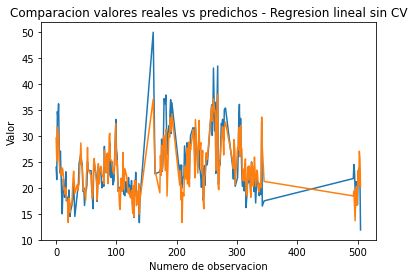

In [129]:
plt.plot(Y)
plt.plot(X_o["predicted"])
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - Regresion lineal sin CV")
plt.show()

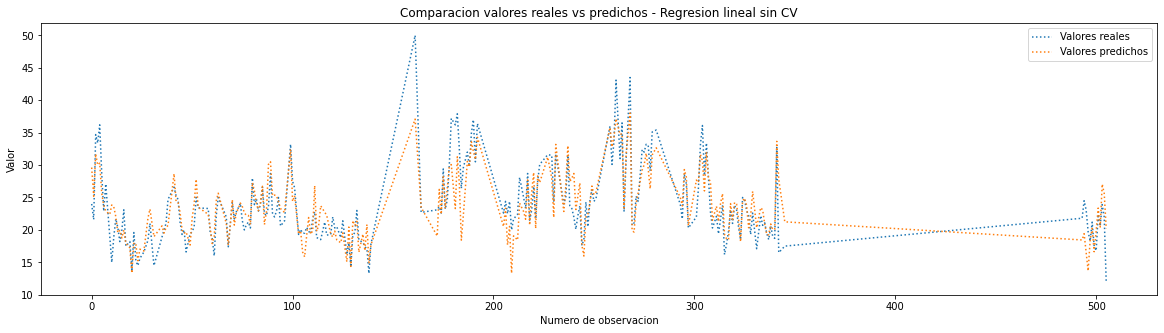

In [130]:
plt.subplots(figsize=(20,5))
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.plot(X_o["predicted"], label="Valores predichos", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - Regresion lineal sin CV")
plt.legend()
plt.show()

In [131]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=16062021)

In [132]:
print(Xtrain.shape)
print(Xtest.shape)

(167, 3)
(83, 3)


In [133]:
model_split = LinearRegression()

model_split.fit(Xtrain, Ytrain)

predict = model_split.predict(Xtest)

print("MSE:  ", mean_squared_error(Ytest, predict))
print("RMSE: ", np.sqrt(mean_squared_error(Ytest, predict)))
print("MAE:  ", mean_absolute_error(Ytest, predict))
print("r2:   ", r2_score(Ytest, predict))

MSE:   8.655129618216614
RMSE:  2.9419601659806025
MAE:   2.205619526518513
r2:    0.7152725918373996


In [134]:
predict.shape

(83,)

In [135]:
Xtest["predict"] = predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
Xtest

rm  ptratio  lstat    predict
101  6.781     20.9   7.67  25.156810
258  7.333     13.0   7.79  36.216262
87   6.121     18.5   8.44  22.864997
113  6.092     17.8  17.09  20.949282
179  6.980     17.8   5.04  30.119006
..     ...      ...    ...        ...
164  5.854     14.7  11.64  23.812134
238  6.481     16.6   6.36  27.602577
327  6.083     19.6  12.79  20.376594
341  7.241     15.5   5.49  33.884664
62   6.456     19.7   6.73  24.409255

[83 rows x 4 columns]

In [137]:
X_aux = Xtest.sort_index()
Y_aux = Ytest.sort_index()

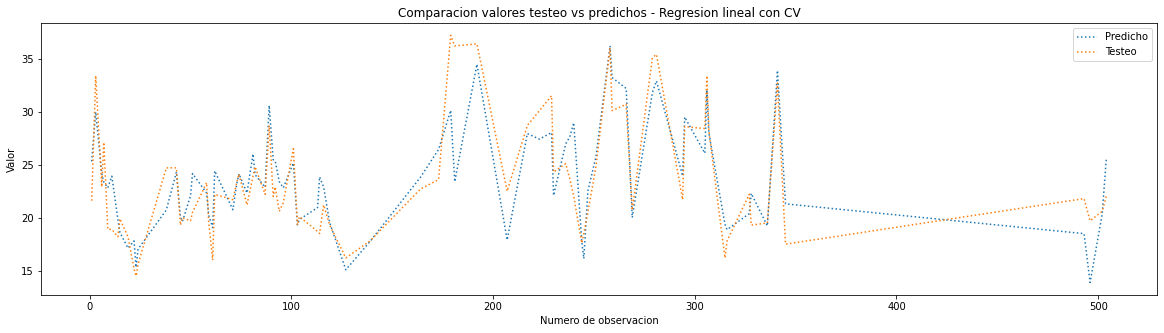

In [138]:
plt.subplots(figsize=(20,5))
plt.plot(X_aux["predict"], label="Predicho", ls=":", marker="")
plt.plot(Y_aux, label="Testeo", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores testeo vs predichos - Regresion lineal con CV")
plt.legend()
plt.show()

In [139]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled_ss = scaler.transform(X)

In [140]:
model_linreg_scaled = LinearRegression()
model_linreg_scaled.fit(X_scaled_ss, Y)
Y_hat_ss = model_linreg_scaled.predict(X_scaled_ss)

In [141]:
Xs = X.copy()

for i in range(0, Xs.shape[0]):
  Xs.iloc[i] = X_scaled_ss[i]

Xs

rm   ptratio     lstat
0    0.602383 -1.522672 -1.239733
1    0.270318 -0.247659 -0.280380
2    1.917705 -0.247659 -1.458816
3    1.514483  0.211346 -1.710185
4    1.835767  0.211346 -1.159019
..        ...       ...       ...
501  0.641196  1.384359 -0.158155
502 -0.378718  1.384359 -0.294217
503  1.467045  1.384359 -1.087528
504  1.074605  1.384359 -0.893813
505 -0.572782  1.384359 -0.570953

[250 rows x 3 columns]

In [142]:
Xs["predicted"] = Y_hat_ss

In [143]:
print("MSE:  ", mean_squared_error(Y_hat_ss, Y))
print("RMSE: ", np.sqrt(mean_squared_error(Y_hat_ss, Y)))
print("MAE:  ", mean_absolute_error(Y_hat_ss, Y))
print("r2:   ", r2_score(Y_hat_ss, Y))

MSE:   9.174483921546608
RMSE:  3.0289410561360564
MAE:   2.192626134890128
r2:    0.6210492844237825


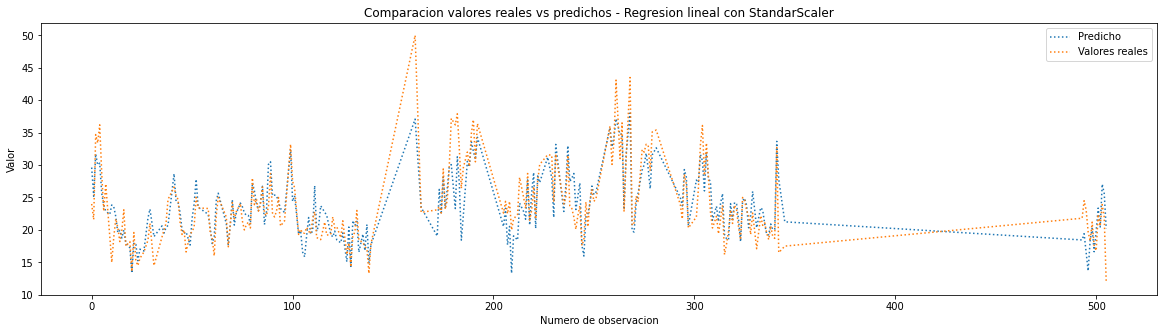

In [144]:
plt.subplots(figsize=(20,5))
plt.plot(Xs["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - Regresion lineal con StandarScaler")
plt.legend()
plt.show()

In [145]:
scaler_mms = MinMaxScaler()
scaler_mms.fit(X)
X_scaled_mms = scaler_mms.transform(X)

In [146]:
model_linreg_mms = LinearRegression()
model_linreg_mms.fit(X_scaled_mms, Y)
Y_hat_mms = model_linreg_scaled.predict(X_scaled_mms)

In [147]:
Xmms = X.copy()

for i in range(0, Xmms.shape[0]):
  Xmms.iloc[i] = X_scaled_mms[i]

Xmms

rm   ptratio     lstat
0    0.565717  0.280488  0.152154
1    0.494945  0.585366  0.346910
2    0.846048  0.585366  0.107678
3    0.760110  0.695122  0.056648
4    0.828585  0.695122  0.168539
..        ...       ...       ...
501  0.573989  0.975610  0.371723
502  0.356618  0.975610  0.344101
503  0.750000  0.975610  0.183052
504  0.666360  0.975610  0.222378
505  0.315257  0.975610  0.287921

[250 rows x 3 columns]

In [148]:
Xmms["predicted"] = Y_hat_mms

In [149]:
print("MSE:  ", mean_squared_error(Y_hat_mms, Y))
print("RMSE: ", np.sqrt(mean_squared_error(Y_hat_mms, Y)))
print("MAE:  ", mean_absolute_error(Y_hat_mms, Y))
print("r2:   ", r2_score(Y_hat_mms, Y))

MSE:   24.098380617892865
RMSE:  4.9090101464442775
MAE:   3.5714677150479335
r2:    -20.074696907909942


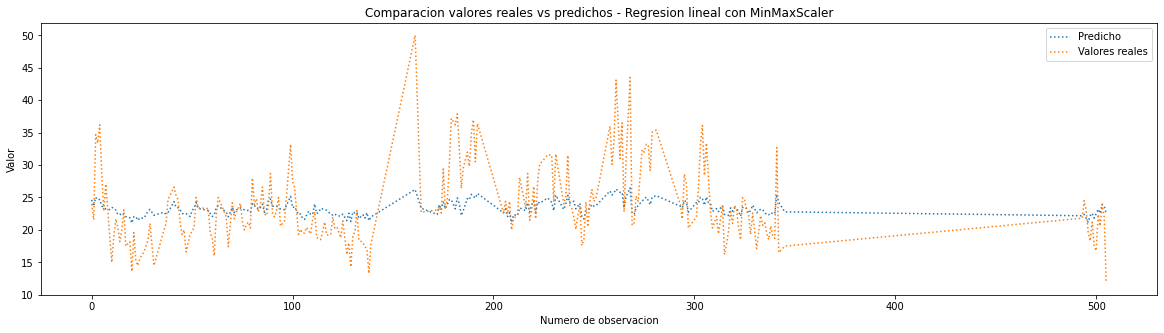

In [150]:
plt.subplots(figsize=(20,5))
plt.plot(Xmms["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - Regresion lineal con MinMaxScaler")
plt.legend()
plt.show()

In [151]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X, Y)

Y_hat_tree = model_tree.predict(X)

In [152]:
Xtree = X.copy()

In [153]:
Xtree["predicted"] = Y_hat_tree

In [154]:
print("MSE:  ", mean_squared_error(Y_hat_tree, Y))
print("RMSE: ", np.sqrt(mean_squared_error(Y_hat_tree, Y)))
print("MAE:  ", mean_absolute_error(Y_hat_tree, Y))
print("r2:   ", r2_score(Y_hat_tree, Y))

MSE:   0.0
RMSE:  0.0
MAE:   0.0
r2:    1.0


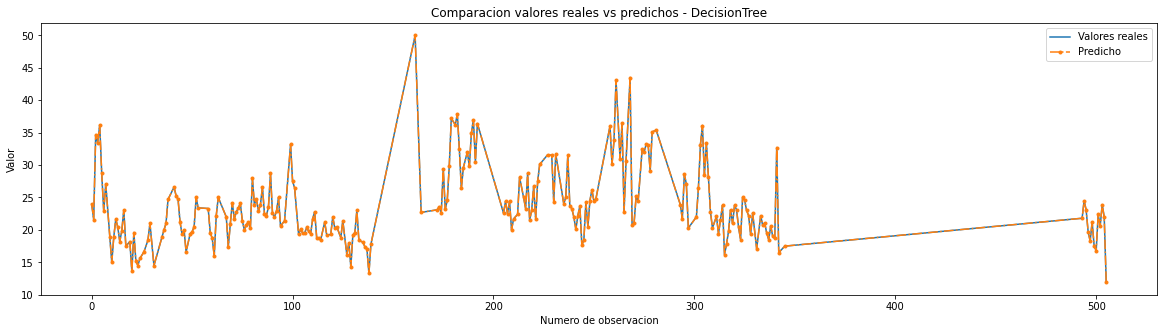

In [155]:
plt.subplots(figsize=(20,5))
plt.plot(Y, label="Valores reales", ls="-", marker="")
plt.plot(Xtree["predicted"], label="Predicho", ls="-.", marker=".")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - DecisionTree")
plt.legend()
plt.show()

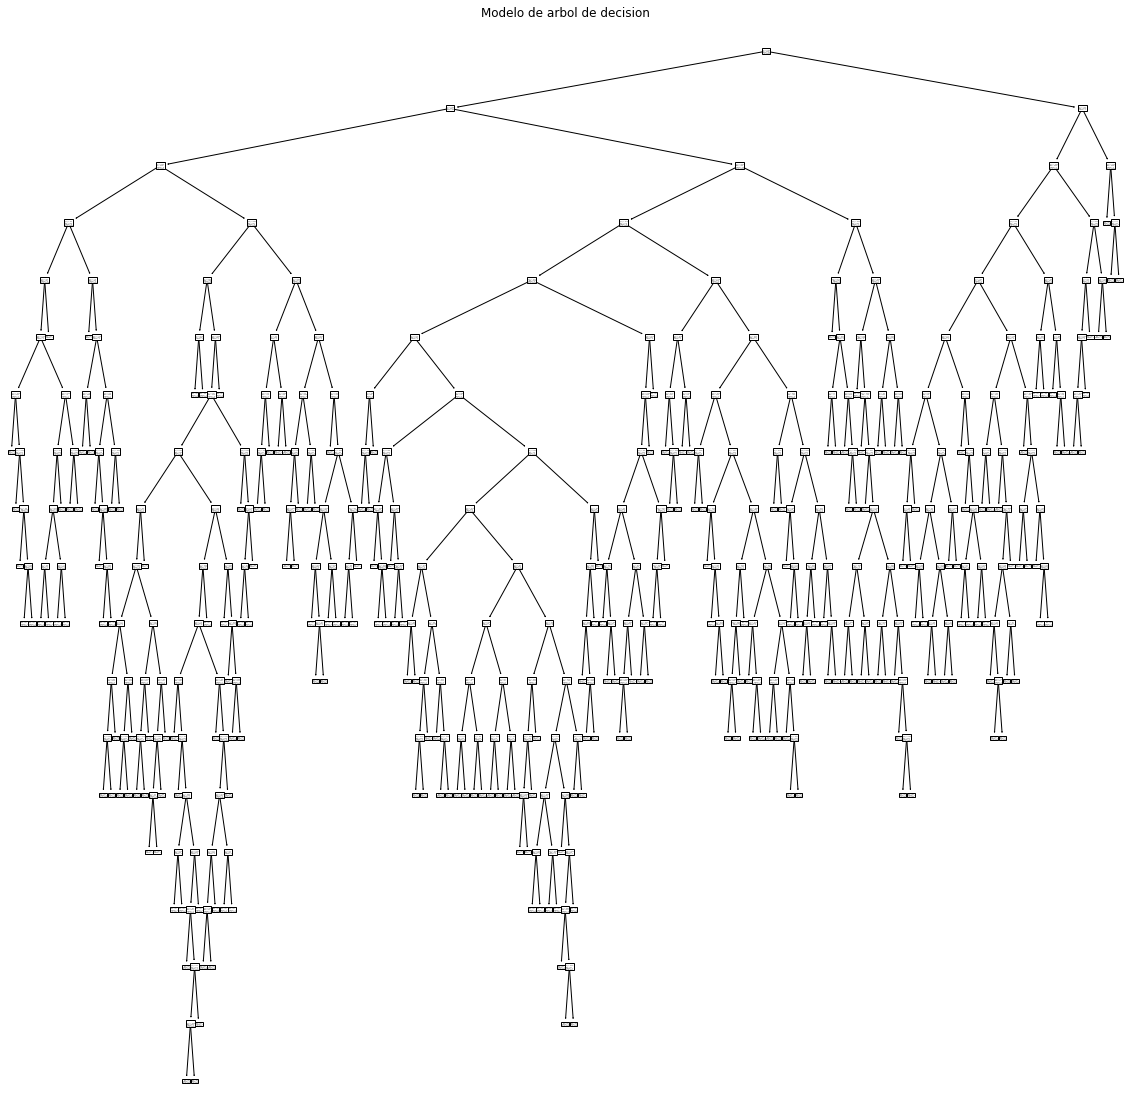

In [156]:
plt.subplots(1,1,figsize=(20,20))
tree.plot_tree(model_tree)
plt.title("Modelo de arbol de decision")
plt.show()

In [157]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=16062021)

In [158]:
model_tree_grid = DecisionTreeRegressor()

params = {"max_depth": np.arange(3, 10),          # ej: [3,4,5]
          "min_samples_split": np.arange(2, 10),  # ej: [2,3,4]
          "random_state": np.array([16062021])
          }


In [159]:
grid = GridSearchCV(estimator=model_tree_grid, param_grid=params, cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

Y_hat_forest_1 = grid.predict(Xtest)

In [160]:
print(grid.best_score_)
print(grid.best_params_)

0.6673883614425868
{'max_depth': 9, 'min_samples_split': 9, 'random_state': 16062021}


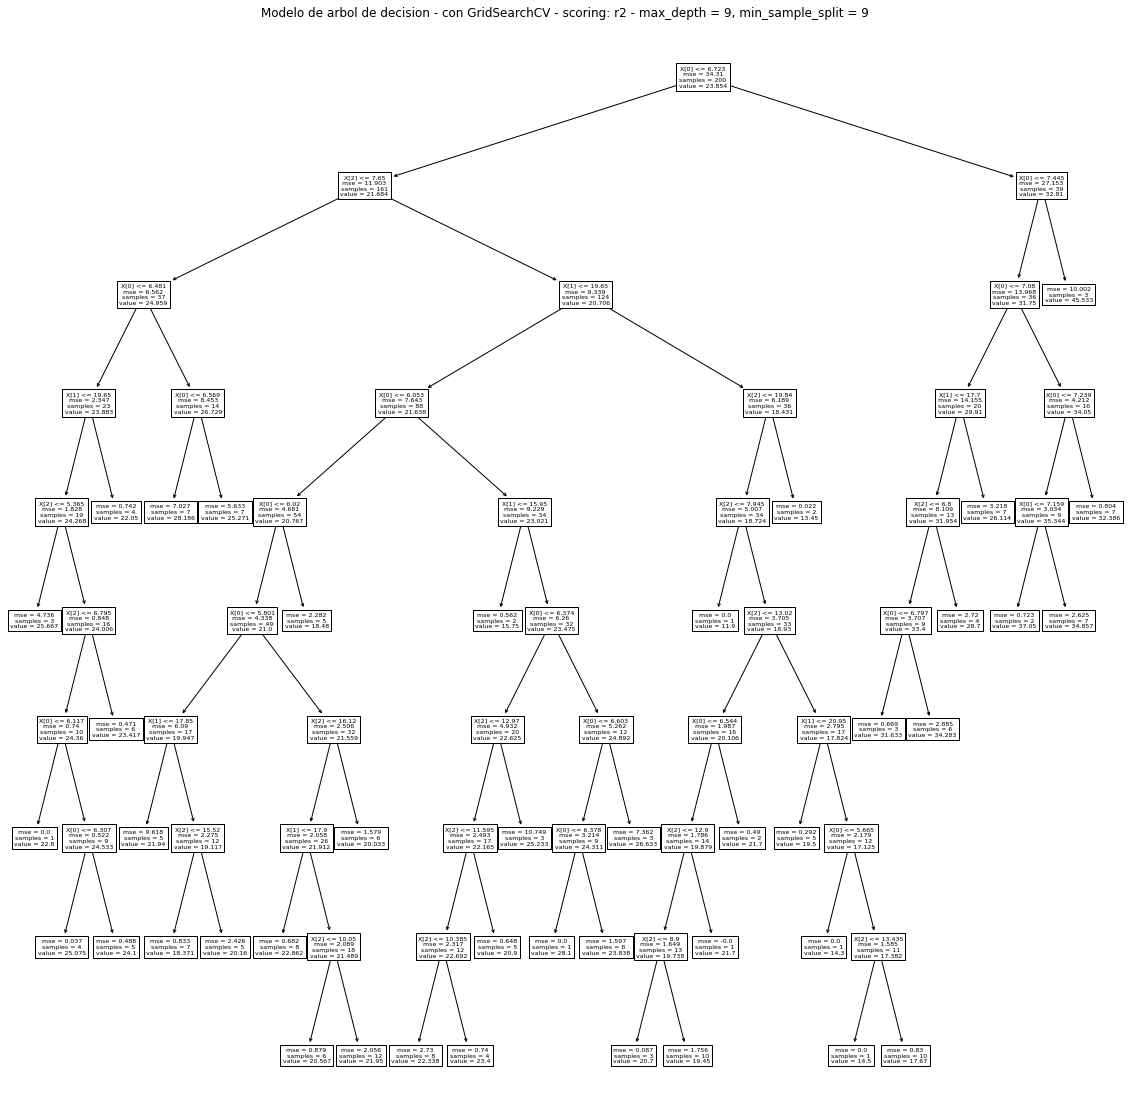

In [161]:
plt.subplots(1,1,figsize=(20,20))
tree.plot_tree(grid.best_estimator_)
plt.title("Modelo de arbol de decision - con GridSearchCV - scoring: r2 - max_depth = 9, min_sample_split = 9")
plt.show()

In [162]:
model_forest = DecisionTreeRegressor(max_depth=9, min_samples_split=9, random_state=16062021)
model_forest.fit(X, Y)

Y_hat_forest_1 = model_forest.predict(X)

In [163]:
Xforest = X.copy()

In [164]:
Xforest["predicted"] = Y_hat_forest_1

In [165]:
print("MSE:  ", mean_squared_error(Y_hat_forest_1, Y))
print("RMSE: ", np.sqrt(mean_squared_error(Y_hat_forest_1, Y)))
print("MAE:  ", mean_absolute_error(Y_hat_forest_1, Y))
print("r2:   ", r2_score(Y_hat_forest_1, Y))

MSE:   2.939905568205878
RMSE:  1.714615282856734
MAE:   1.238501824007195
r2:    0.9034349124591207


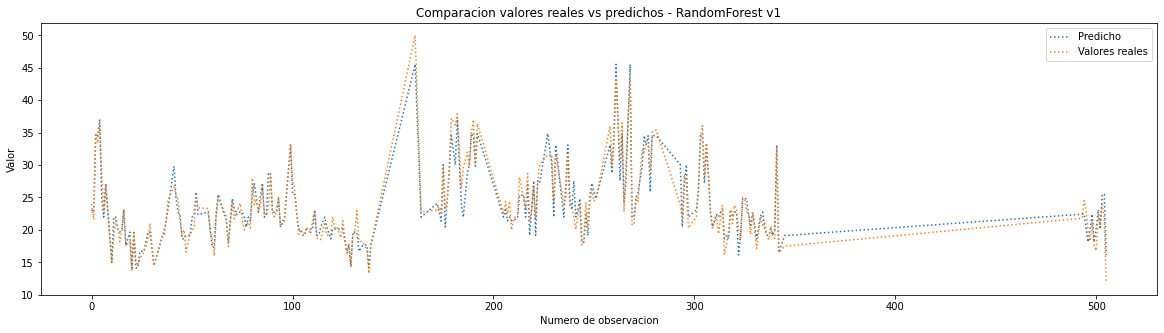

In [166]:
plt.subplots(figsize=(20,5))
plt.plot(Xforest["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - RandomForest v1")
plt.legend()
plt.show()

In [167]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=16062021)

In [168]:
model_tree_grid = DecisionTreeRegressor()

params = {"max_depth": np.arange(3, 6),          # ej: [3,4,5]
          "min_samples_split": np.arange(2, 5),  # ej: [2,3,4]
          "random_state": np.array([16062021])
          }


In [169]:
grid_2 = GridSearchCV(estimator=model_tree_grid, param_grid=params, cv=10, scoring='r2')
grid_2.fit(Xtrain, Ytrain)

Y_hat_forest_2 = grid.predict(Xtest)

In [170]:
print(grid_2.best_score_)
print(grid_2.best_params_)

0.6671926702219386
{'max_depth': 3, 'min_samples_split': 3, 'random_state': 16062021}


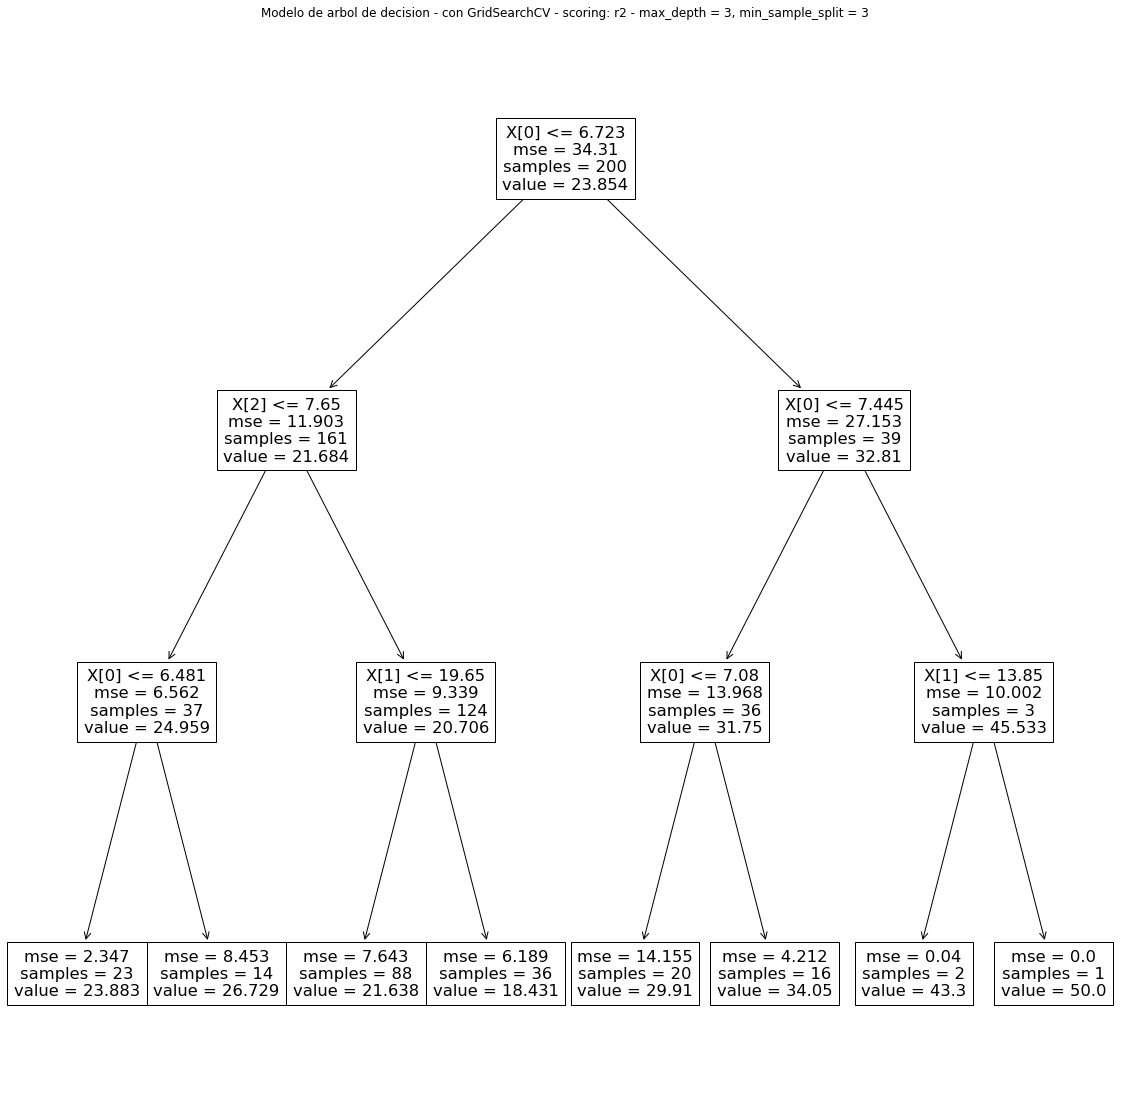

In [171]:
plt.subplots(1,1,figsize=(20,20))
tree.plot_tree(grid_2.best_estimator_)
plt.title("Modelo de arbol de decision - con GridSearchCV - scoring: r2 - max_depth = 3, min_sample_split = 3")
plt.show()

In [172]:
model_forest_2 = DecisionTreeRegressor(max_depth=3, min_samples_split=3, random_state=16062021)
model_forest_2.fit(X, Y)

Y_hat_forest_2 = model_forest_2.predict(X)

In [173]:
Xforest_2 = X.copy()

In [174]:
Xforest_2["predicted"] = Y_hat_forest_2

In [175]:
print("MSE:  ", mean_squared_error(Xforest_2["predicted"], Y))
print("RMSE: ", np.sqrt(mean_squared_error(Xforest_2["predicted"], Y)))
print("MAE:  ", mean_absolute_error(Xforest_2["predicted"], Y))
print("r2:   ", r2_score(Xforest_2["predicted"], Y))

MSE:   7.842822568507225
RMSE:  2.8005039847333237
MAE:   2.0718621761799088
r2:    0.6929427617670132


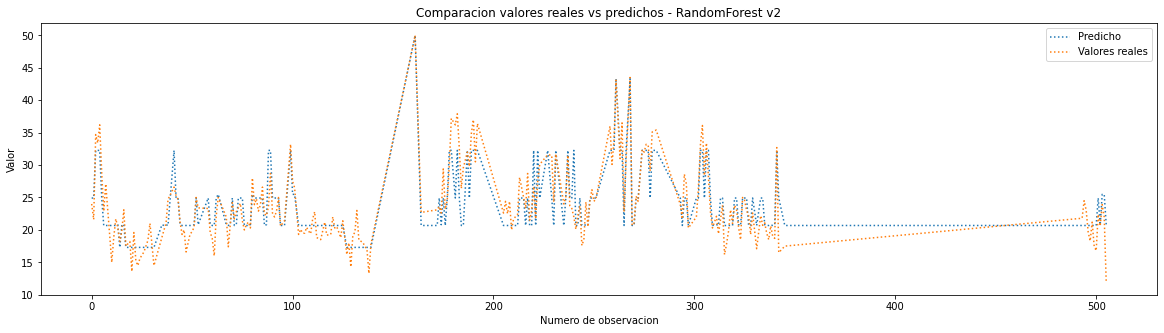

In [176]:
plt.subplots(figsize=(20,5))
plt.plot(Xforest_2["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - RandomForest v2")
plt.legend()
plt.show()

# Resumen

## Vista General

El dataset utilizado fue boston housing. Contiene 14 carácteristicas de 506 observaciones. Ellas son:

- crim: % de criminalidad per cápita por ciudad.
- zn: proporción de tierras residenciales por lotes mayores a 25000 pies cuadrados.
- indus: proporción de acres de empresas no retail por ciudad.
- chas: booleana. 1 si colinda con el rio Charles, 0 si no.
- nox: concentración de óxidos de nitrógeno, medido en partes por 10 millones.
- rm: promedio de habitaciones por vivienda.
- age: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- dis: promedio ponderado de distancias a 5 centros de empleos de Boston.
- rad: índice de accesibilidad a carreteras principales.
- tax: impuesto sobre bienes inmuebles cada USD 10000
- ptratio: proporción estudiante-profesor por ciudad
- black: $ 1000*(Bk - 0.63)^2 $, con **Bk** siendo la proporcion de gente negra por ciudad.
- lstat: % de población de menor status (considera gente sin estudios/con algo de educación secundaria y trabajadores hombres clasificados como obreros)
- medv: mediana del valor de las casas, medido en USD 1000's



Descripción estadística:

In [177]:
df_clean.describe()

crim          zn       indus  ...       black       lstat        medv
count  250.000000  250.000000  250.000000  ...  250.000000  250.000000  250.000000
mean     0.242534    7.914000    8.304080  ...  391.529760   10.355800   23.593200
std      0.290813   13.008246    5.133506  ...    6.503728    4.344954    5.789541
min      0.006320    0.000000    1.520000  ...  372.080000    1.730000   11.900000
25%      0.070153    0.000000    4.980000  ...  389.407500    6.862500   19.725000
50%      0.132100    0.000000    6.960000  ...  393.805000    9.675000   22.450000
75%      0.277023   20.000000    9.900000  ...  396.900000   13.135000   25.175000
max      2.242360   45.000000   25.650000  ...  396.900000   23.090000   50.000000

[8 rows x 14 columns]

## Limpieza y preparación de datos

Primero se dispuso de los boxplots de los features:

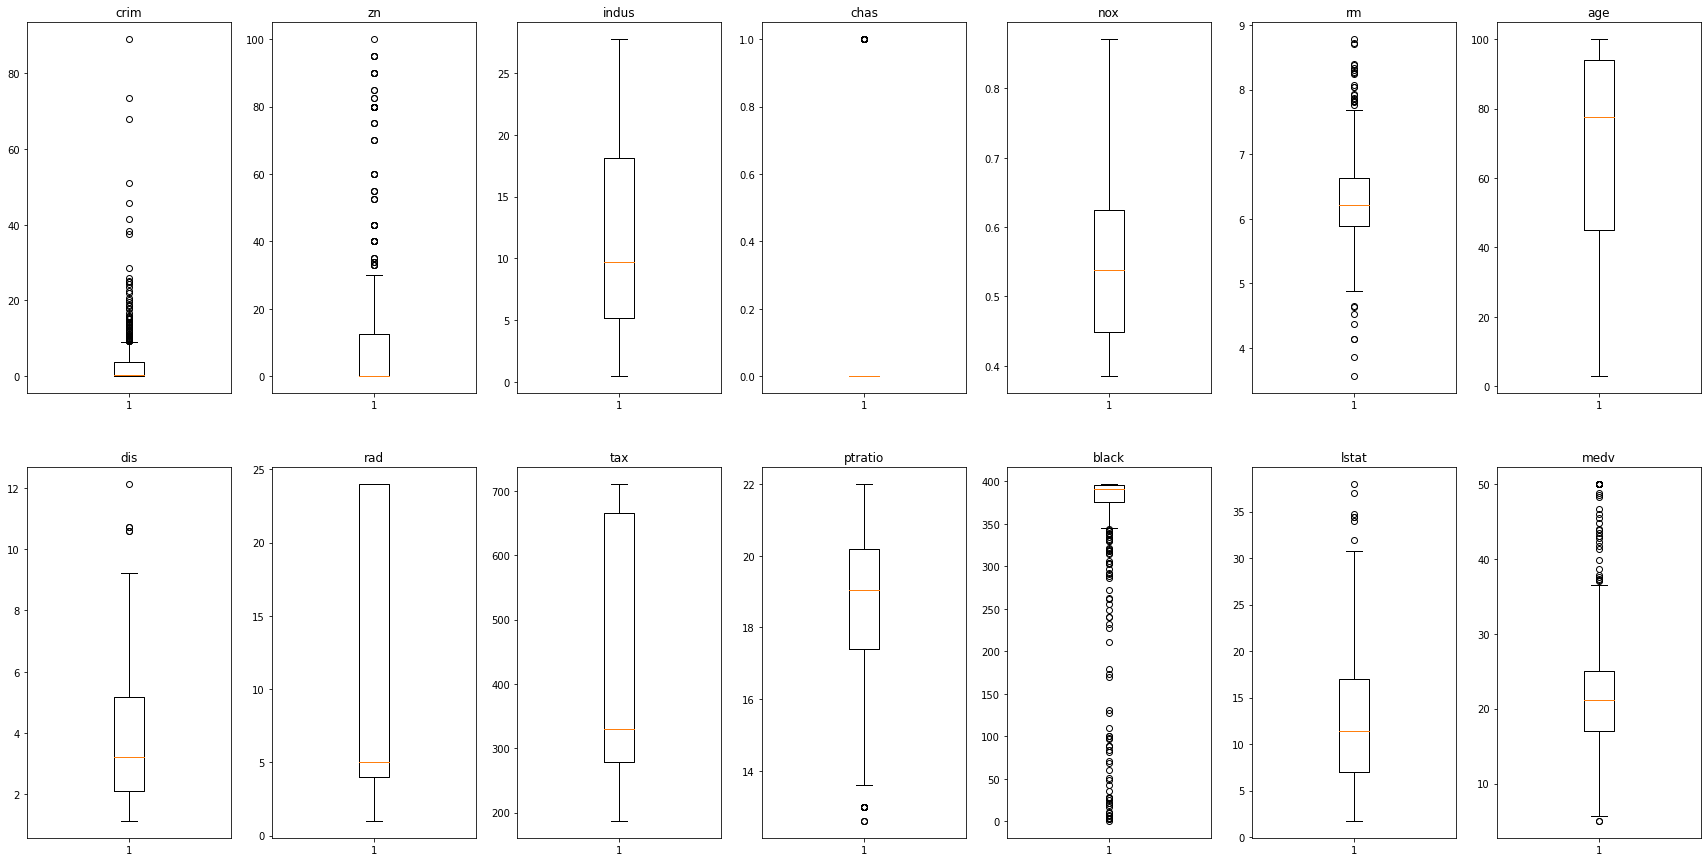

In [178]:
cols = df.columns.values.tolist() #lista que contiene los nombres de las columnas, es decir, de las caracteristicas

fig, axs = plt.subplots(2,7,figsize=(30,15)) #crea subplot con 14 espacios

c = 0
for i in range(0, 2): #itera y asigna boxplots a cada espacio
  for j in range(0, 7):
    axs[i,j].boxplot(df[cols[c]])
    axs[i,j].set_title(cols[c])
    c += 1

plt.show()

Siguiendo lo mencionado en **Preparación da datos**, se filtró el dataset según el rango intercuartílico $\pm$ $1.5$ $IQR,$ obteniendo:

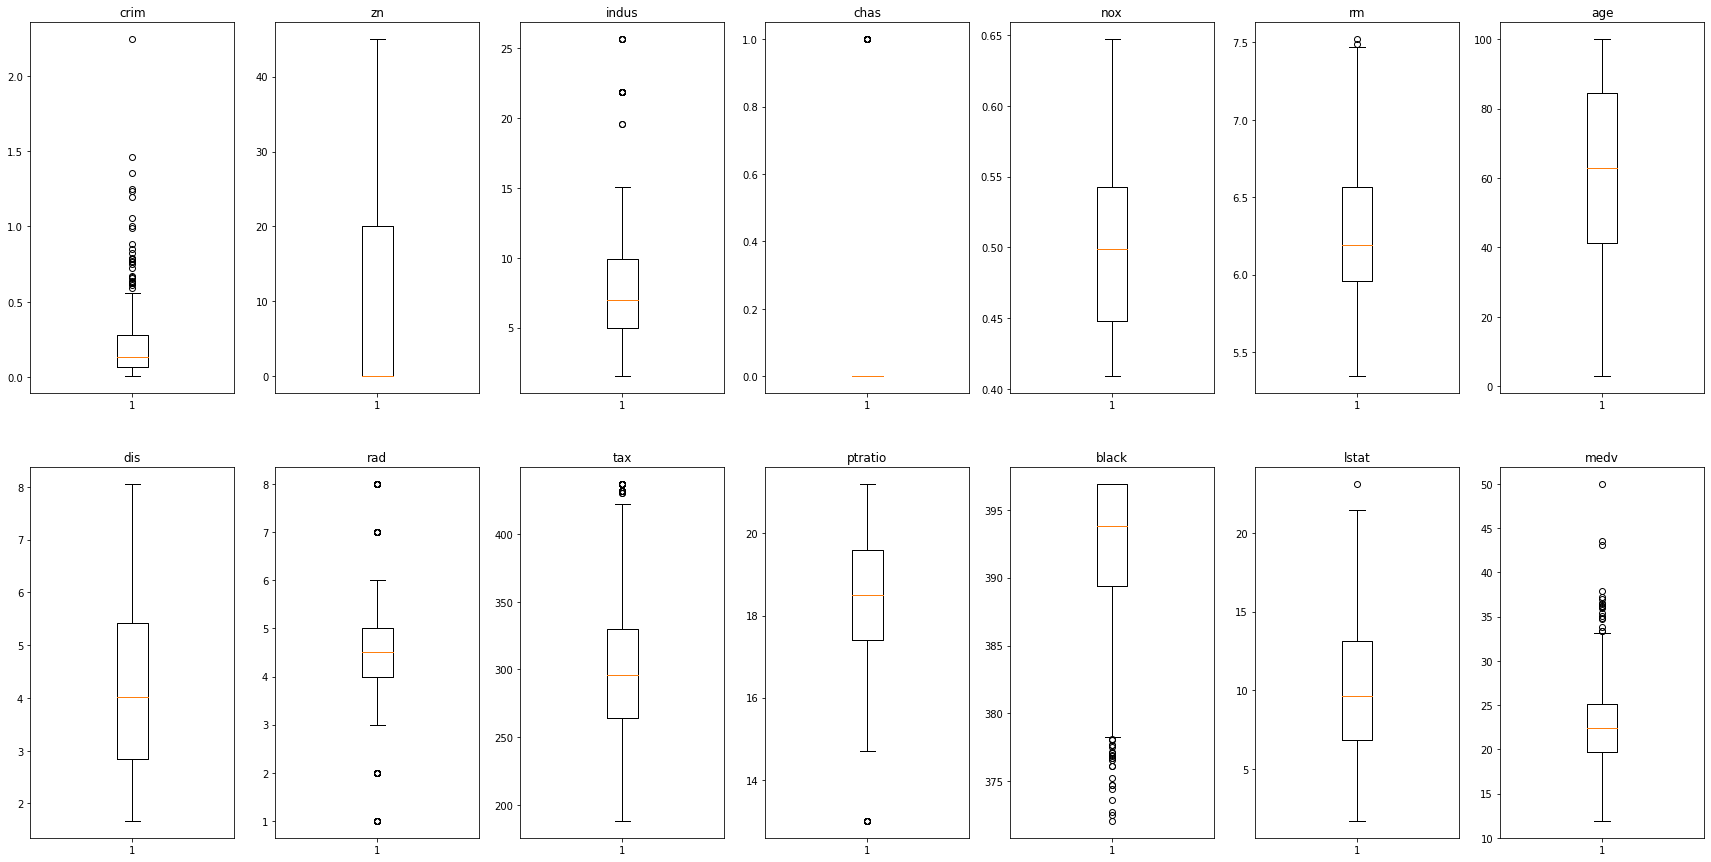

In [179]:
cols = df_clean.columns.values.tolist() #lista que contiene los nombres de las columnas, es decir, de las caracteristicas

fig, axs = plt.subplots(2,7,figsize=(30,15)) #crea subplot con 14 espacios

c = 0
for i in range(0, 2): #itera y asigna boxplots a cada espacio
  for j in range(0, 7):
    axs[i,j].boxplot(df_clean[cols[c]])
    axs[i,j].set_title(cols[c])
    c += 1

plt.show()

In [180]:
df_clean.shape[0]/df.shape[0]

0.49407114624505927

Con estos filtros, el dataset pasó a contener el 49.41% de los datos originales. La disminución está dada por la aplicación de filtros a todos los features.

Seguido a esto, se obtuvo la matriz de correlación y su respectivo mapa de calor:

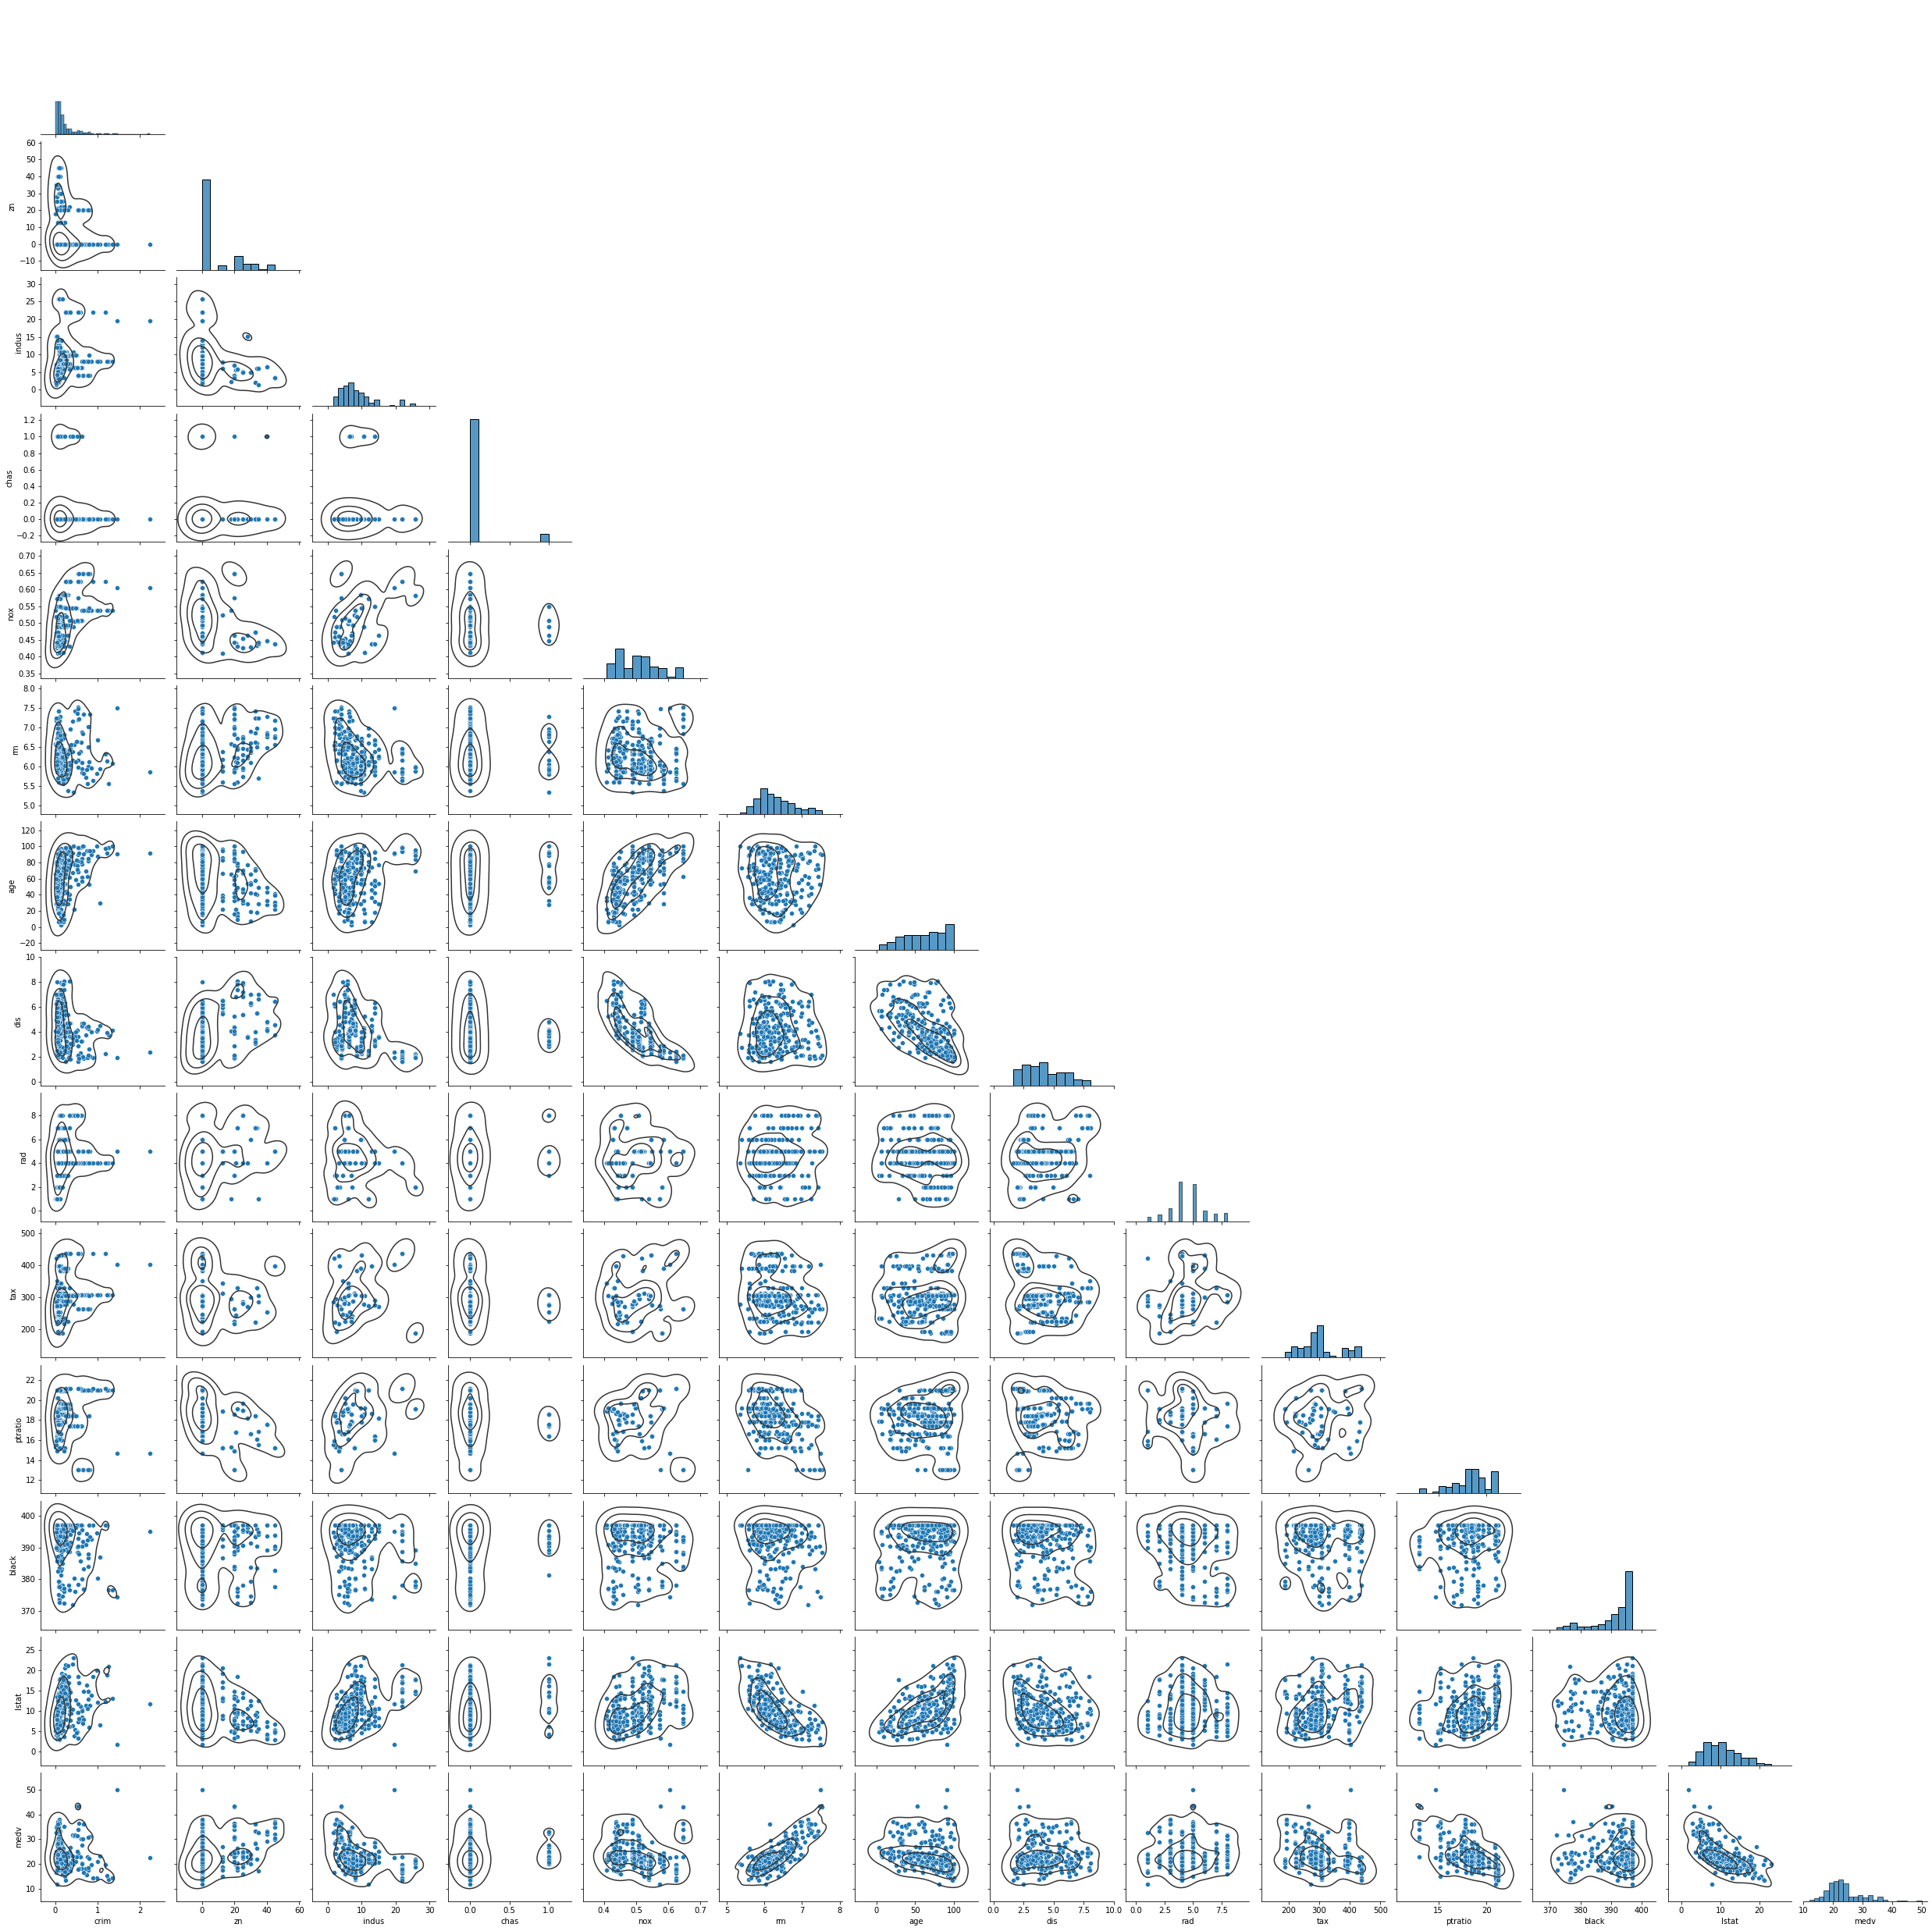

In [181]:
g = sns.pairplot(df_clean, corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

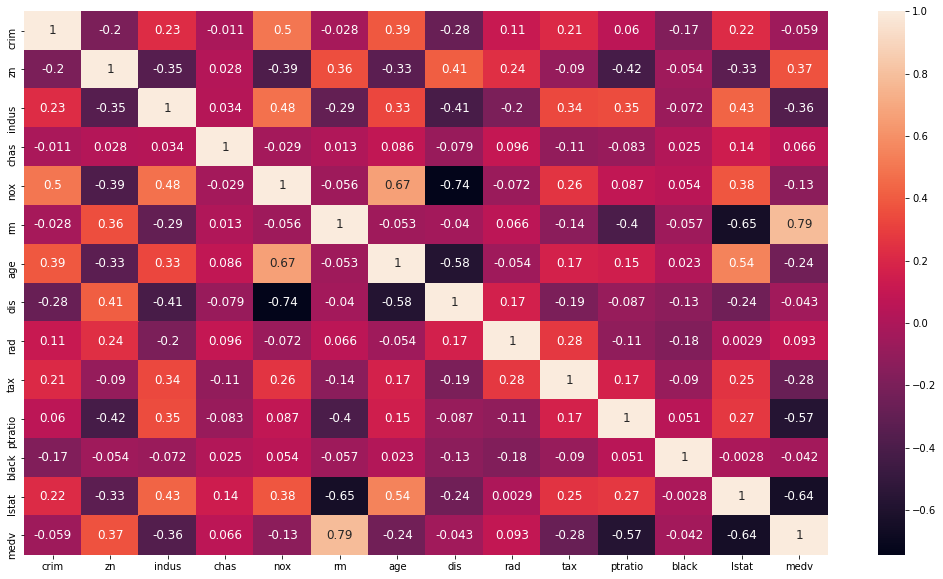

In [182]:
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

Con esta información, se procedió a eliminar las columnas que no conllevan mayor correlación con el target ***medv***. De manera arbitraria, se escogió un límite de $\pm 0.4$ como coeficiente de correlación. Cualquier valor mayor a tal límite, tendrá mayor influencia en la obtención de un correcto precio final.

Se obtuvo que:

In [183]:
corr_value

corr value
rm         0.788222
ptratio   -0.568388
lstat     -0.642424
medv       1.000000

Al eliminar las columnas menos relevante, o equivalentemente, las que no estaban presentes en ***corr_value***, se obtuvo un dataset operacional **df_op**:

In [184]:
df_op.sample(5)

rm  ptratio  lstat  medv
174  5.859     16.6   9.64  22.6
496  5.390     19.2  21.14  19.7
295  6.678     16.0   6.27  28.6
303  6.982     16.1   4.86  33.1
70   6.417     19.2   6.72  24.2

En base a este, se aplicaron diferentes modelos. A continuación se muestra la nueva matriz de correlación obtenida a partir de **df_op**:

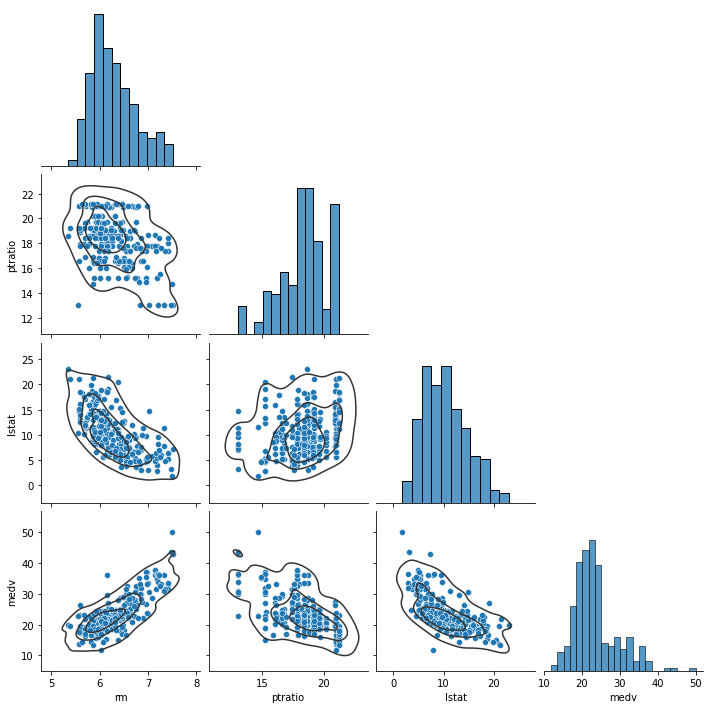

In [185]:
g = sns.pairplot(df_op, corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

## Entrenamiento de modelos y resultados

Se entrenaron diferentes modelos aplicando distintas formas:

- Regresión lineal sin CV
- Regresión lineal con CV
- Estandarización de datos
- Escalado de datos por MinMaxScaler
- Árbol de decisión
- Random Forest

Al final, en la presentación de métricas, se dispone un resumen de resultados.

### Regresión lineal sin CV

In [186]:
print("MSE:  ", mean_squared_error(Y, Y_hat_1))
print("RMSE: ", np.sqrt(mean_squared_error(Y, Y_hat_1)))
print("MAE:  ", mean_absolute_error(Y, Y_hat_1))
print("r2:   ", r2_score(Y, Y_hat_1))

MSE:   9.174483921546608
RMSE:  3.0289410561360564
MAE:   2.192626134890128
r2:    0.7251890794241571


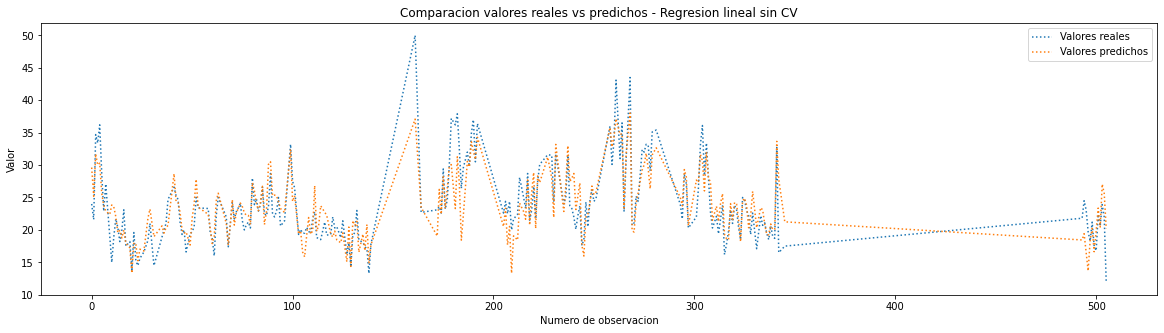

In [187]:
plt.subplots(figsize=(20,5))
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.plot(X_o["predicted"], label="Valores predichos", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - Regresion lineal sin CV")
plt.legend()
plt.show()

### Regresión lineal con CV


In [188]:
print("MSE:  ", mean_squared_error(Y_aux, X_aux["predict"]))
print("RMSE: ", np.sqrt(mean_squared_error(Y_aux, X_aux["predict"])))
print("MAE:  ", mean_absolute_error(Y_aux, X_aux["predict"]))
print("r2:   ", r2_score(Y_aux, X_aux["predict"]))

MSE:   8.655129618216613
RMSE:  2.941960165980602
MAE:   2.205619526518513
r2:    0.7152725918373996


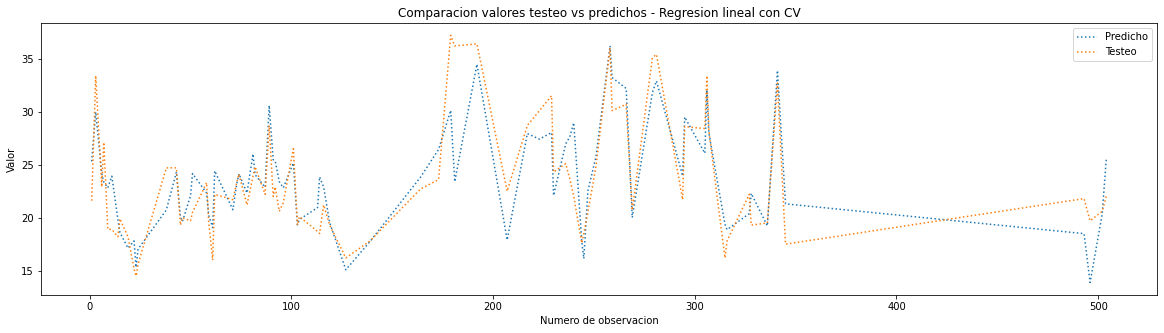

In [189]:
plt.subplots(figsize=(20,5))
plt.plot(X_aux["predict"], label="Predicho", ls=":", marker="")
plt.plot(Y_aux, label="Testeo", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores testeo vs predichos - Regresion lineal con CV")
plt.legend()
plt.show()

### Estandarización de datos

In [190]:
print("MSE:  ", mean_squared_error(Xs["predicted"], Y))
print("RMSE: ", np.sqrt(mean_squared_error(Xs["predicted"], Y)))
print("MAE:  ", mean_absolute_error(Xs["predicted"], Y))
print("r2:   ", r2_score(Xs["predicted"], Y))

MSE:   9.174483921546608
RMSE:  3.0289410561360564
MAE:   2.192626134890128
r2:    0.6210492844237825


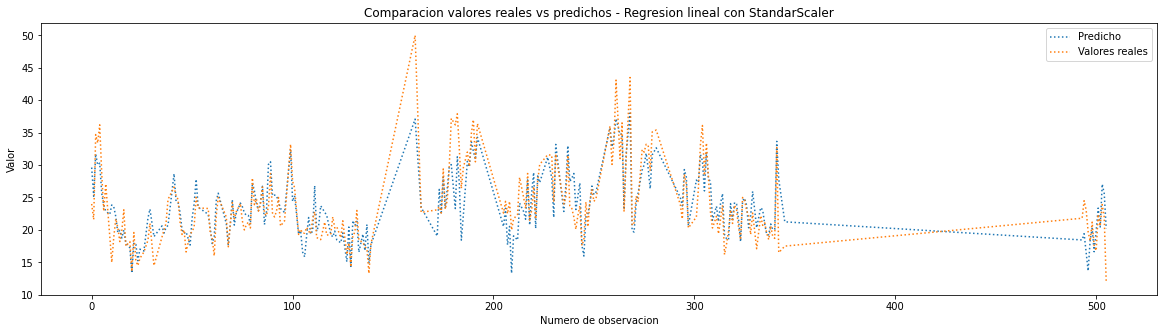

In [191]:
plt.subplots(figsize=(20,5))
plt.plot(Xs["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - Regresion lineal con StandarScaler")
plt.legend()
plt.show()

### Escalado de datos por MinMaxScaler

In [192]:
print("MSE:  ", mean_squared_error(Xmms["predicted"], Y))
print("RMSE: ", np.sqrt(mean_squared_error(Xmms["predicted"], Y)))
print("MAE:  ", mean_absolute_error(Xmms["predicted"], Y))
print("r2:   ", r2_score(Xmms["predicted"], Y))

MSE:   24.098380617892865
RMSE:  4.9090101464442775
MAE:   3.5714677150479335
r2:    -20.074696907909942


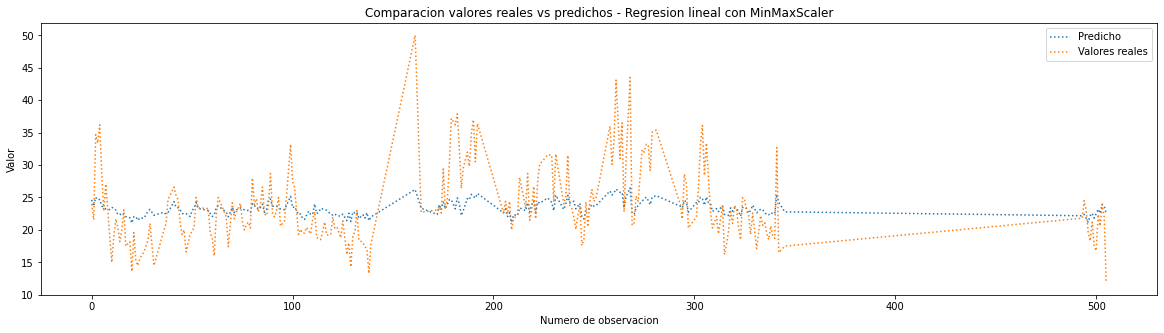

In [193]:
plt.subplots(figsize=(20,5))
plt.plot(Xmms["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - Regresion lineal con MinMaxScaler")
plt.legend()
plt.show()

### Árbol de decisión

In [194]:
print("MSE:  ", mean_squared_error(Xtree["predicted"], Y))
print("RMSE: ", np.sqrt(mean_squared_error(Xtree["predicted"], Y)))
print("MAE:  ", mean_absolute_error(Xtree["predicted"], Y))
print("r2:   ", r2_score(Xtree["predicted"], Y))

MSE:   0.0
RMSE:  0.0
MAE:   0.0
r2:    1.0


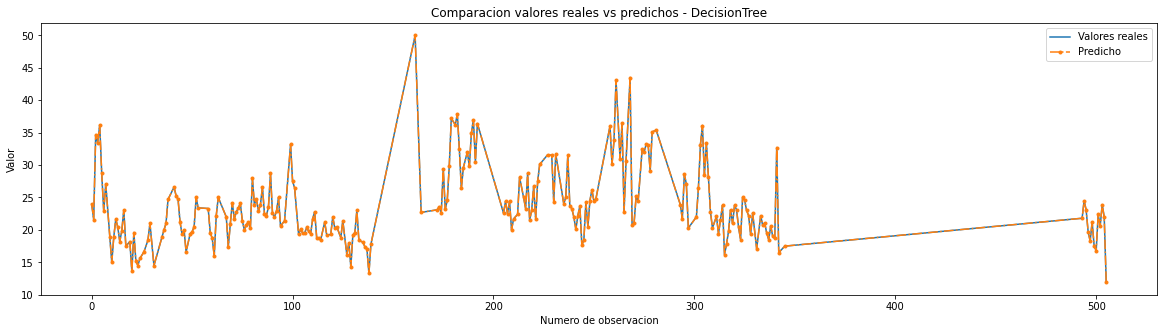

In [195]:
plt.subplots(figsize=(20,5))
plt.plot(Y, label="Valores reales", ls="-", marker="")
plt.plot(Xtree["predicted"], label="Predicho", ls="-.", marker=".")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - DecisionTree")
plt.legend()
plt.show()

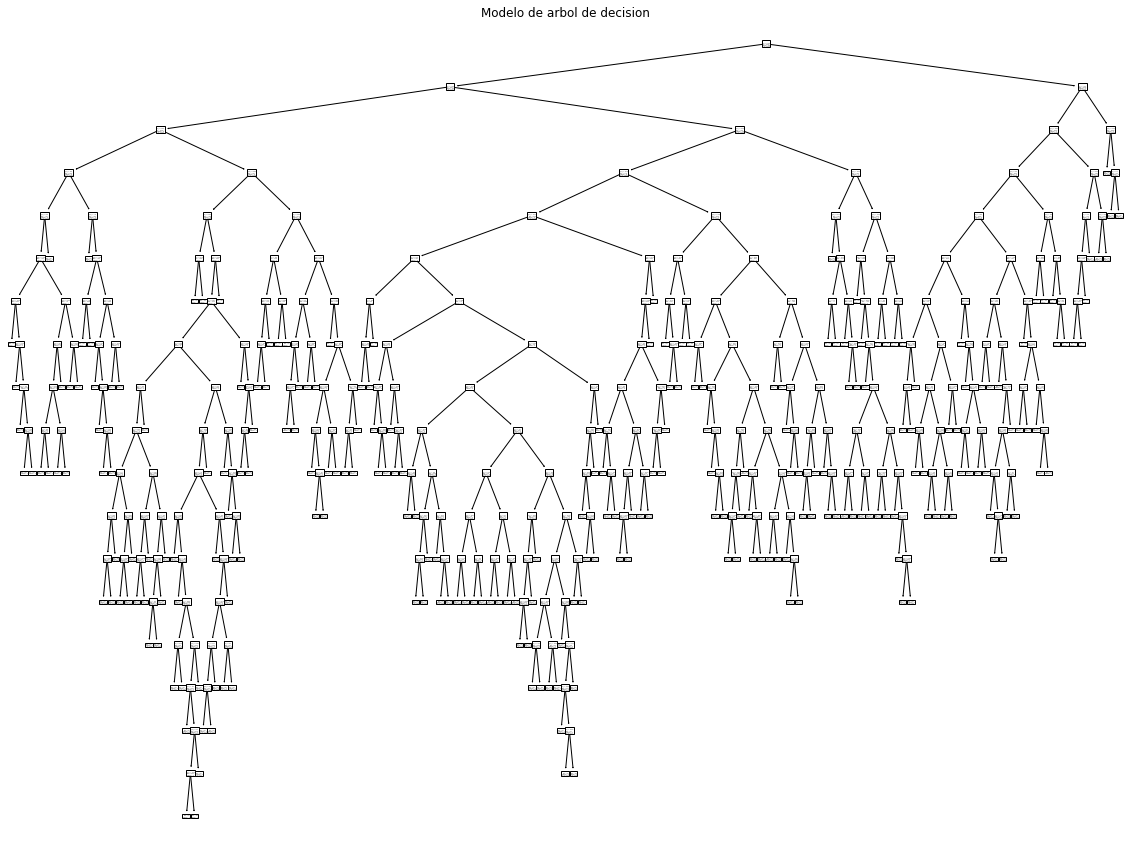

In [196]:
plt.subplots(1,1,figsize=(20,15))
tree.plot_tree(model_tree)
plt.title("Modelo de arbol de decision")
plt.show()

### Random Forest

#### Random Forest

          params = {"max_depth": np.arange(3, 10),
          "min_samples_split": np.arange(2, 10),
          "random_state": np.array([16062021])
          }

In [197]:
print(grid.best_params_)

{'max_depth': 9, 'min_samples_split': 9, 'random_state': 16062021}


In [198]:
print("MSE:  ", mean_squared_error(Xforest["predicted"], Y))
print("RMSE: ", np.sqrt(mean_squared_error(Xforest["predicted"], Y)))
print("MAE:  ", mean_absolute_error(Xforest["predicted"], Y))
print("r2:   ", r2_score(Xforest["predicted"], Y))

MSE:   2.939905568205878
RMSE:  1.714615282856734
MAE:   1.238501824007195
r2:    0.9034349124591207


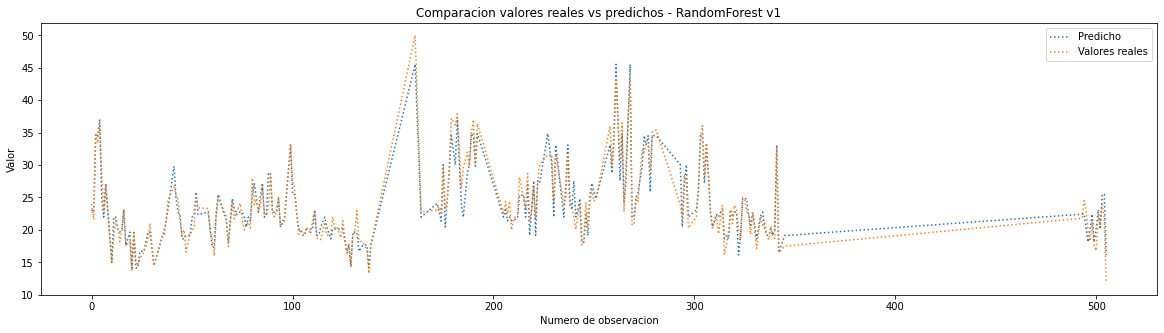

In [199]:
plt.subplots(figsize=(20,5))
plt.plot(Xforest["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - RandomForest v1")
plt.legend()
plt.show()

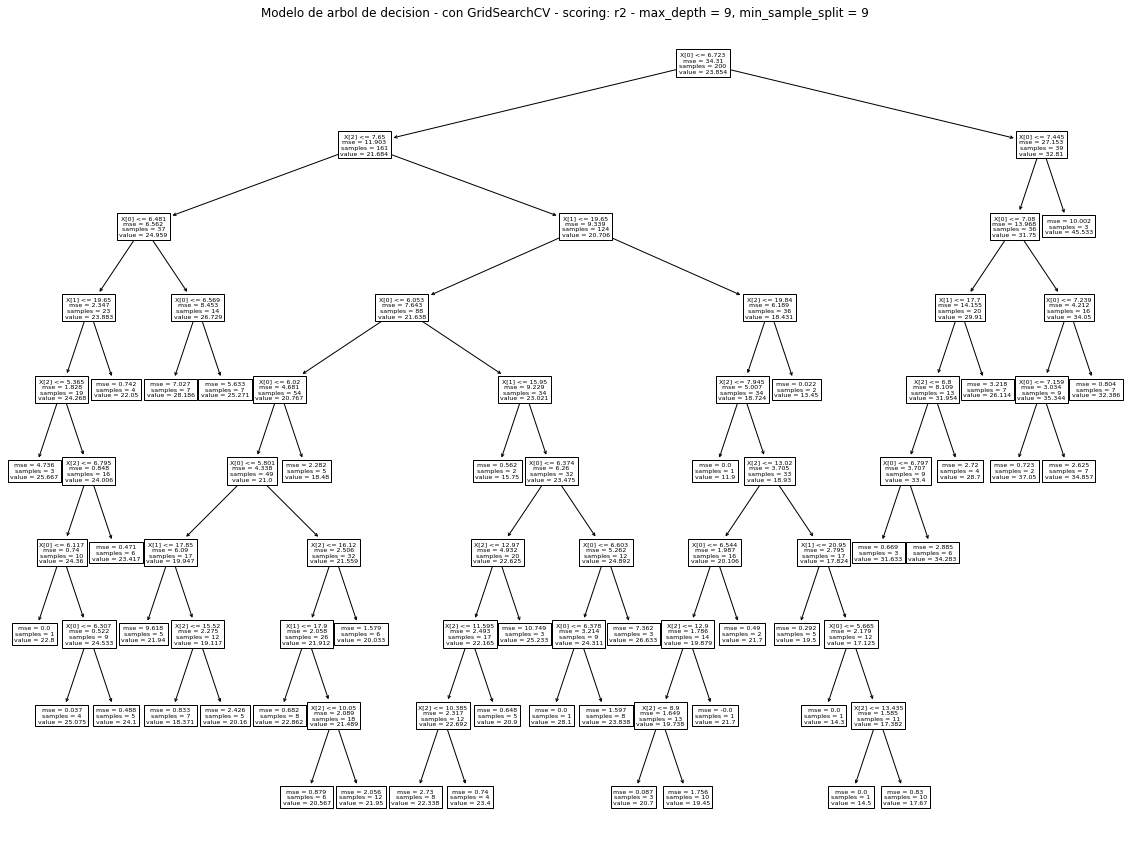

In [200]:
plt.subplots(1,1,figsize=(20,15))
tree.plot_tree(grid.best_estimator_)
plt.title("Modelo de arbol de decision - con GridSearchCV - scoring: r2 - max_depth = 9, min_sample_split = 9")
plt.show()

#### Random Forest

          params = {"max_depth": np.arange(3, 6),
          "min_samples_split": np.arange(2, 5),
          "random_state": np.array([16062021])
          }


In [201]:
print(grid_2.best_params_)

{'max_depth': 3, 'min_samples_split': 3, 'random_state': 16062021}


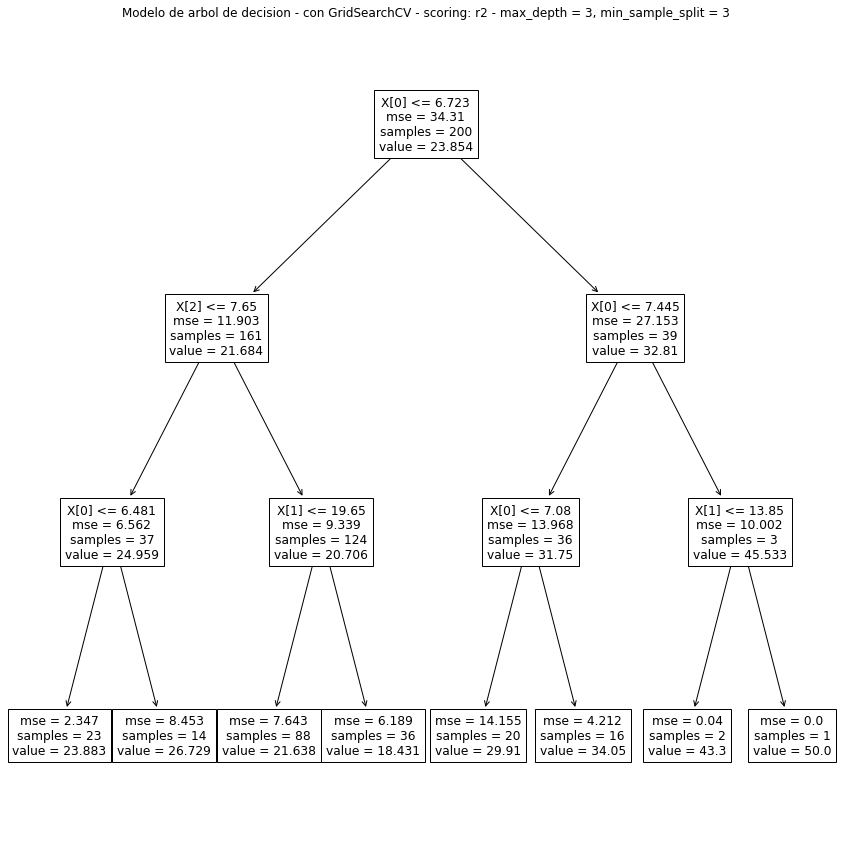

In [202]:
plt.subplots(1,1,figsize=(15,15))
tree.plot_tree(grid_2.best_estimator_)
plt.title("Modelo de arbol de decision - con GridSearchCV - scoring: r2 - max_depth = 3, min_sample_split = 3")
plt.show()

In [203]:
print("MSE:  ", mean_squared_error(Xforest_2["predicted"], Y))
print("RMSE: ", np.sqrt(mean_squared_error(Xforest_2["predicted"], Y)))
print("MAE:  ", mean_absolute_error(Xforest_2["predicted"], Y))
print("r2:   ", r2_score(Xforest_2["predicted"], Y))

MSE:   7.842822568507225
RMSE:  2.8005039847333237
MAE:   2.0718621761799088
r2:    0.6929427617670132


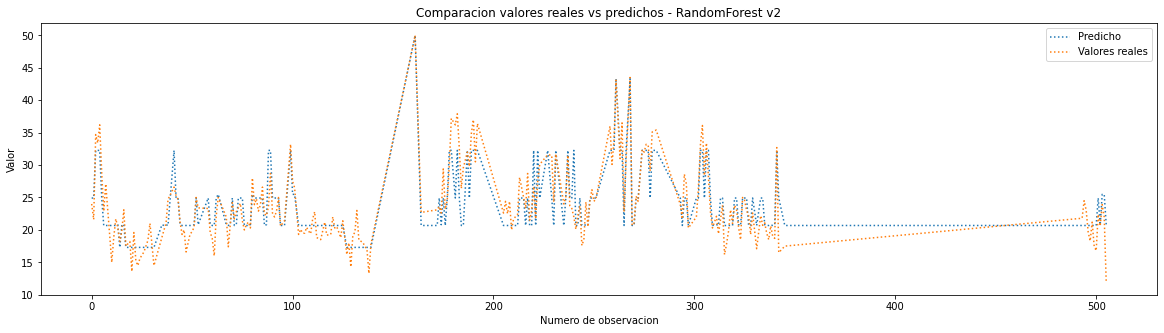

In [204]:
plt.subplots(figsize=(20,5))
plt.plot(Xforest_2["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos - RandomForest v2")
plt.legend()
plt.show()

### Resumen de métricas

In [205]:
data_metricas = {'MSE':[mean_squared_error(X_o["predicted"], Y),
                        mean_squared_error(Y_aux, X_aux["predict"]),
                        mean_squared_error(Xs["predicted"], Y),
                        mean_squared_error(Xmms["predicted"], Y),
                        mean_squared_error(Xtree["predicted"], Y),
                        mean_squared_error(Xforest["predicted"], Y), 
                        mean_squared_error(Xforest_2["predicted"], Y),],
                 'RMSE':[ np.sqrt(mean_squared_error(X_o["predicted"], Y)), 
                          np.sqrt(mean_squared_error(X_aux["predict"], Y_aux)), 
                          np.sqrt(mean_squared_error(Xs["predicted"], Y)), 
                          np.sqrt(mean_squared_error(Xmms["predicted"], Y)), 
                          np.sqrt(mean_squared_error(Xtree["predicted"], Y)), 
                          np.sqrt(mean_squared_error(Xforest["predicted"], Y)), 
                          np.sqrt(mean_squared_error(Xforest_2["predicted"], Y))],
                 'MAE':[mean_absolute_error(X_o["predicted"], Y), 
                        mean_absolute_error(X_aux["predict"], Y_aux), 
                        mean_absolute_error(Xs["predicted"], Y), 
                        mean_absolute_error(Xmms["predicted"], Y), 
                        mean_absolute_error(Xtree["predicted"], Y), 
                        mean_absolute_error(Xforest["predicted"], Y), 
                        mean_absolute_error(Xforest_2["predicted"], Y)],
                 'R2':[r2_score(X_o["predicted"], Y), 
                       r2_score(X_aux["predict"], Y_aux), 
                       r2_score(Xs["predicted"], Y), 
                       r2_score(Xmms["predicted"], Y), 
                       r2_score(Xtree["predicted"], Y), 
                       r2_score(Xforest["predicted"], Y), 
                       r2_score(Xforest_2["predicted"], Y)]}

index_metricas = ['Regresión lineal sin CV',
                  'Regresión lineal con CV',
                  'Aplicando StandarScaler',
                  'Aplicando MinMaxScaler',
                  'Decision Tree',
                  'Random Forest v1',
                  'Random Forest v2']                  

df_metricas = pd.DataFrame(data_metricas, index=index_metricas)

df_metricas

MSE      RMSE       MAE         R2
Regresión lineal sin CV   9.174484  3.028941  2.192626   0.621049
Regresión lineal con CV   8.655130  2.941960  2.205620   0.628375
Aplicando StandarScaler   9.174484  3.028941  2.192626   0.621049
Aplicando MinMaxScaler   24.098381  4.909010  3.571468 -20.074697
Decision Tree             0.000000  0.000000  0.000000   1.000000
Random Forest v1          2.939906  1.714615  1.238502   0.903435
Random Forest v2          7.842823  2.800504  2.071862   0.692943

- Dado que $ MSE, \; RMSE \; y \; MAE $ son magnitudes de errores, a menor sean, más cerca están los valores predichos de los valores reales. A más cercanos a 0, mas cercanos están los valores predichos a los valores reales.
- $R^2$ llega a un máximo de 1, indicando este una perfecta correspondencia entre los valores reales y los predichos. Tal caso no es óptimo por presentar claramente overfitting.
- De acuerdo a las métricas obtenidas, se presentan $Regresion Lineal \; con \; CV$ y $Random Forest \; v1$ como módelos óptimos en base a los modelos revisados.